In [1]:
import warnings
warnings.filterwarnings("ignore")

from config import get_config
from train import train_model

import sys
sys.path.append(r'D:\Uni_FJFI\NMS3\DP\project_I\System-Imbalance-Forecasting\models\transfromer_decoder_only')
import inference_helpers

In [3]:
## Multiple model training
cfg = get_config()
num_models = 8

for k in range(1, num_models+1):
    print(f"MODEL TRAINING - #{k}")
    print(20*"-")
    cfg = get_config()
    cfg['preload'] = None
    cfg['num_epochs'] = 50
    cfg["exo_vars"] = [
                "month_sin", "month_cos", "day_sin", "day_cos", "hour_sin", "hour_cos",
                "quarter_hour_sin", "quarter_hour_cos", "measured_&_upscaled_wind",
                "most_recent_forecast_wind", "total_load",
                "most_recent_forecast_load", "measured_&_upscaled_solar",
                "most_recent_forecast_solar", 'year', 'not_working', 'holiday',
    ]

    cfg["tgt_step"] = k-1
    cfg['run'] += f"_exact{k}"
    cfg['model_folder'] += cfg['run']
    cfg['experiment_name'] = f"runs{cfg['run']}/tmodel"


    model = train_model(cfg)
    print(20*"-")

MODEL TRAINING - #1
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 672/672 [00:02<00:00, 313.51it/s, step_loss=21042.752]


Training loss of epoch 0: 32357.66145252046


100%|██████████| 23/23 [00:00<00:00, 366.06it/s]


Validation loss of epoch 0: 27512.869140625


Processing Epoch 01: 100%|██████████| 672/672 [00:02<00:00, 332.27it/s, step_loss=40184.109]


Training loss of epoch 1: 30630.265520368303


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 1: 26483.03125


Processing Epoch 02: 100%|██████████| 672/672 [00:02<00:00, 327.77it/s, step_loss=41216.516]


Training loss of epoch 2: 29280.05704171317


100%|██████████| 23/23 [00:00<00:00, 354.79it/s]


Validation loss of epoch 2: 25530.88671875


Processing Epoch 03: 100%|██████████| 672/672 [00:02<00:00, 313.63it/s, step_loss=37723.879]


Training loss of epoch 3: 28076.56766619001


100%|██████████| 23/23 [00:00<00:00, 277.75it/s]


Validation loss of epoch 3: 24668.96484375


Processing Epoch 04: 100%|██████████| 672/672 [00:02<00:00, 305.19it/s, step_loss=35487.176]


Training loss of epoch 4: 26942.326032366072


100%|██████████| 23/23 [00:00<00:00, 268.07it/s]


Validation loss of epoch 4: 23764.484375


Processing Epoch 05: 100%|██████████| 672/672 [00:02<00:00, 278.11it/s, step_loss=16597.346]


Training loss of epoch 5: 25855.69655064174


100%|██████████| 23/23 [00:00<00:00, 291.92it/s]


Validation loss of epoch 5: 22967.197265625


Processing Epoch 06: 100%|██████████| 672/672 [00:02<00:00, 287.86it/s, step_loss=26285.506]


Training loss of epoch 6: 24856.77321225121


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 6: 22193.1640625


Processing Epoch 07: 100%|██████████| 672/672 [00:02<00:00, 286.21it/s, step_loss=17472.340]


Training loss of epoch 7: 23960.139382498604


100%|██████████| 23/23 [00:00<00:00, 311.64it/s]


Validation loss of epoch 7: 21496.70703125


Processing Epoch 08: 100%|██████████| 672/672 [00:02<00:00, 291.42it/s, step_loss=16524.848]


Training loss of epoch 8: 23076.966846284413


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 8: 20866.630859375


Processing Epoch 09: 100%|██████████| 672/672 [00:02<00:00, 294.97it/s, step_loss=16062.749]


Training loss of epoch 9: 22343.609303792316


100%|██████████| 23/23 [00:00<00:00, 281.24it/s]


Validation loss of epoch 9: 20293.02734375


Processing Epoch 10: 100%|██████████| 672/672 [00:02<00:00, 284.52it/s, step_loss=27075.535]


Training loss of epoch 10: 21677.49386306036


100%|██████████| 23/23 [00:00<00:00, 247.97it/s]


Validation loss of epoch 10: 19727.603515625


Processing Epoch 11: 100%|██████████| 672/672 [00:02<00:00, 291.75it/s, step_loss=20400.990]


Training loss of epoch 11: 21072.75298200335


100%|██████████| 23/23 [00:00<00:00, 288.26it/s]


Validation loss of epoch 11: 19168.115234375


Processing Epoch 12: 100%|██████████| 672/672 [00:02<00:00, 281.02it/s, step_loss=33920.699]


Training loss of epoch 12: 20510.031072707403


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 12: 18732.650390625


Processing Epoch 13: 100%|██████████| 672/672 [00:02<00:00, 290.37it/s, step_loss=10206.190]


Training loss of epoch 13: 20089.454472133093


100%|██████████| 23/23 [00:00<00:00, 281.23it/s]


Validation loss of epoch 13: 18238.56640625


Processing Epoch 14: 100%|██████████| 672/672 [00:02<00:00, 287.24it/s, step_loss=16651.410]


Training loss of epoch 14: 19733.953998384022


100%|██████████| 23/23 [00:00<00:00, 324.72it/s]


Validation loss of epoch 14: 17878.990234375


Processing Epoch 15: 100%|██████████| 672/672 [00:02<00:00, 284.20it/s, step_loss=25615.801]


Training loss of epoch 15: 19335.228965395974


100%|██████████| 23/23 [00:00<00:00, 245.33it/s]


Validation loss of epoch 15: 17451.1171875


Processing Epoch 16: 100%|██████████| 672/672 [00:02<00:00, 285.45it/s, step_loss=22282.051]


Training loss of epoch 16: 19042.555273146856


100%|██████████| 23/23 [00:00<00:00, 264.99it/s]


Validation loss of epoch 16: 17133.62890625


Processing Epoch 17: 100%|██████████| 672/672 [00:02<00:00, 284.30it/s, step_loss=9677.995] 


Training loss of epoch 17: 18758.76700991676


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 17: 16792.48046875


Processing Epoch 18: 100%|██████████| 672/672 [00:02<00:00, 282.61it/s, step_loss=14389.306]


Training loss of epoch 18: 18462.23039027623


100%|██████████| 23/23 [00:00<00:00, 284.70it/s]


Validation loss of epoch 18: 16476.08203125


Processing Epoch 19: 100%|██████████| 672/672 [00:02<00:00, 281.51it/s, step_loss=11843.726]


Training loss of epoch 19: 18280.771779378254


100%|██████████| 23/23 [00:00<00:00, 291.93it/s]


Validation loss of epoch 19: 16201.0244140625


Processing Epoch 20: 100%|██████████| 672/672 [00:02<00:00, 285.67it/s, step_loss=20304.520]


Training loss of epoch 20: 18074.31765238444


100%|██████████| 23/23 [00:00<00:00, 253.42it/s]


Validation loss of epoch 20: 16002.23046875


Processing Epoch 21: 100%|██████████| 672/672 [00:02<00:00, 288.93it/s, step_loss=22280.871]


Training loss of epoch 21: 17841.293023972285


100%|██████████| 23/23 [00:00<00:00, 274.54it/s]


Validation loss of epoch 21: 15793.1171875


Processing Epoch 22: 100%|██████████| 672/672 [00:02<00:00, 293.40it/s, step_loss=16244.575]


Training loss of epoch 22: 17653.236656552268


100%|██████████| 23/23 [00:00<00:00, 307.48it/s]


Validation loss of epoch 22: 15539.6015625


Processing Epoch 23: 100%|██████████| 672/672 [00:02<00:00, 282.02it/s, step_loss=14103.012]


Training loss of epoch 23: 17490.848134358723


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 23: 15423.720703125


Processing Epoch 24: 100%|██████████| 672/672 [00:02<00:00, 285.81it/s, step_loss=16234.981]


Training loss of epoch 24: 17304.490215483165


100%|██████████| 23/23 [00:00<00:00, 309.22it/s]


Validation loss of epoch 24: 15158.640625


Processing Epoch 25: 100%|██████████| 672/672 [00:02<00:00, 280.56it/s, step_loss=13100.420]


Training loss of epoch 25: 17203.978860037667


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 25: 15044.369140625


Processing Epoch 26: 100%|██████████| 672/672 [00:02<00:00, 280.80it/s, step_loss=17385.588]


Training loss of epoch 26: 17083.882138206845


100%|██████████| 23/23 [00:00<00:00, 240.23it/s]


Validation loss of epoch 26: 14901.71484375


Processing Epoch 27: 100%|██████████| 672/672 [00:02<00:00, 276.53it/s, step_loss=27486.693]


Training loss of epoch 27: 16960.80833071754


100%|██████████| 23/23 [00:00<00:00, 320.29it/s]


Validation loss of epoch 27: 14672.857421875


Processing Epoch 28: 100%|██████████| 672/672 [00:02<00:00, 279.69it/s, step_loss=9321.583] 


Training loss of epoch 28: 16789.722602480935


100%|██████████| 23/23 [00:00<00:00, 318.05it/s]


Validation loss of epoch 28: 14636.7646484375


Processing Epoch 29: 100%|██████████| 672/672 [00:02<00:00, 284.48it/s, step_loss=17300.354]


Training loss of epoch 29: 16751.673635573614


100%|██████████| 23/23 [00:00<00:00, 281.14it/s]


Validation loss of epoch 29: 14468.8671875


Processing Epoch 30: 100%|██████████| 672/672 [00:02<00:00, 279.85it/s, step_loss=16894.232]


Training loss of epoch 30: 16631.781144641696


100%|██████████| 23/23 [00:00<00:00, 284.71it/s]


Validation loss of epoch 30: 14340.6708984375


Processing Epoch 31: 100%|██████████| 672/672 [00:02<00:00, 275.06it/s, step_loss=12008.313]


Training loss of epoch 31: 16626.299442836218


100%|██████████| 23/23 [00:00<00:00, 305.78it/s]


Validation loss of epoch 31: 14329.6005859375


Processing Epoch 32: 100%|██████████| 672/672 [00:02<00:00, 292.48it/s, step_loss=8652.670] 


Training loss of epoch 32: 16480.367388044084


100%|██████████| 23/23 [00:00<00:00, 242.75it/s]


Validation loss of epoch 32: 14163.162109375


Processing Epoch 33: 100%|██████████| 672/672 [00:02<00:00, 280.18it/s, step_loss=11228.837]


Training loss of epoch 33: 16419.095692952473


100%|██████████| 23/23 [00:00<00:00, 259.12it/s]


Validation loss of epoch 33: 14061.595703125


Processing Epoch 34: 100%|██████████| 672/672 [00:02<00:00, 277.86it/s, step_loss=12002.814]


Training loss of epoch 34: 16342.936503092447


100%|██████████| 23/23 [00:00<00:00, 268.16it/s]


Validation loss of epoch 34: 14029.4248046875


Processing Epoch 35: 100%|██████████| 672/672 [00:02<00:00, 273.63it/s, step_loss=19921.332]


Training loss of epoch 35: 16197.612936837333


100%|██████████| 23/23 [00:00<00:00, 277.85it/s]


Validation loss of epoch 35: 13969.7841796875


Processing Epoch 36: 100%|██████████| 672/672 [00:02<00:00, 281.65it/s, step_loss=13179.158]


Training loss of epoch 36: 16164.535507202148


100%|██████████| 23/23 [00:00<00:00, 268.15it/s]


Validation loss of epoch 36: 13928.82421875


Processing Epoch 37: 100%|██████████| 672/672 [00:02<00:00, 277.66it/s, step_loss=10446.047]


Training loss of epoch 37: 16149.346419561476


100%|██████████| 23/23 [00:00<00:00, 268.07it/s]


Validation loss of epoch 37: 13809.3818359375


Processing Epoch 38: 100%|██████████| 672/672 [00:02<00:00, 294.61it/s, step_loss=13474.893]


Training loss of epoch 38: 16093.613363356817


100%|██████████| 23/23 [00:00<00:00, 271.31it/s]


Validation loss of epoch 38: 13694.9951171875


Processing Epoch 39: 100%|██████████| 672/672 [00:02<00:00, 289.40it/s, step_loss=10941.175]


Training loss of epoch 39: 15991.163840884254


100%|██████████| 23/23 [00:00<00:00, 250.67it/s]


Validation loss of epoch 39: 13696.298828125


Processing Epoch 40: 100%|██████████| 672/672 [00:02<00:00, 287.72it/s, step_loss=19305.037]


Training loss of epoch 40: 15949.451737176805


100%|██████████| 23/23 [00:00<00:00, 250.72it/s]


Validation loss of epoch 40: 13566.2685546875


Processing Epoch 41: 100%|██████████| 672/672 [00:02<00:00, 290.30it/s, step_loss=17081.703]


Training loss of epoch 41: 15890.218457176572


100%|██████████| 23/23 [00:00<00:00, 262.06it/s]


Validation loss of epoch 41: 13548.4990234375


Processing Epoch 42: 100%|██████████| 672/672 [00:02<00:00, 289.65it/s, step_loss=13139.972]


Training loss of epoch 42: 15865.1561773391


100%|██████████| 23/23 [00:00<00:00, 277.85it/s]


Validation loss of epoch 42: 13536.265625


Processing Epoch 43: 100%|██████████| 672/672 [00:02<00:00, 285.79it/s, step_loss=10997.706]


Training loss of epoch 43: 15819.875752040318


100%|██████████| 23/23 [00:00<00:00, 265.08it/s]


Validation loss of epoch 43: 13456.36328125


Processing Epoch 44: 100%|██████████| 672/672 [00:02<00:00, 283.34it/s, step_loss=15159.652]


Training loss of epoch 44: 15830.828504289899


100%|██████████| 23/23 [00:00<00:00, 262.06it/s]


Validation loss of epoch 44: 13430.658203125


Processing Epoch 45: 100%|██████████| 672/672 [00:02<00:00, 282.84it/s, step_loss=18465.986]


Training loss of epoch 45: 15799.163891020275


100%|██████████| 23/23 [00:00<00:00, 277.86it/s]


Validation loss of epoch 45: 13390.271484375


Processing Epoch 46: 100%|██████████| 672/672 [00:02<00:00, 290.00it/s, step_loss=15624.670]


Training loss of epoch 46: 15731.113133021763


100%|██████████| 23/23 [00:00<00:00, 284.71it/s]


Validation loss of epoch 46: 13349.7353515625


Processing Epoch 47: 100%|██████████| 672/672 [00:02<00:00, 282.73it/s, step_loss=15754.544]


Training loss of epoch 47: 15691.672532581148


100%|██████████| 23/23 [00:00<00:00, 259.12it/s]


Validation loss of epoch 47: 13325.2939453125


Processing Epoch 48: 100%|██████████| 672/672 [00:02<00:00, 286.38it/s, step_loss=6882.318] 


Training loss of epoch 48: 15657.982032412574


100%|██████████| 23/23 [00:00<00:00, 315.79it/s]


Validation loss of epoch 48: 13309.3017578125


Processing Epoch 49: 100%|██████████| 672/672 [00:02<00:00, 285.74it/s, step_loss=19170.494]


Training loss of epoch 49: 15680.97162882487


100%|██████████| 23/23 [00:00<00:00, 240.23it/s]


Validation loss of epoch 49: 13228.7158203125
--------------------
MODEL TRAINING - #2
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 672/672 [00:02<00:00, 267.35it/s, step_loss=31587.857]


Training loss of epoch 0: 32365.933916364396


100%|██████████| 23/23 [00:00<00:00, 288.27it/s]


Validation loss of epoch 0: 27570.099609375


Processing Epoch 01: 100%|██████████| 672/672 [00:02<00:00, 266.22it/s, step_loss=28094.119]


Training loss of epoch 1: 30729.327314104354


100%|██████████| 23/23 [00:00<00:00, 324.81it/s]


Validation loss of epoch 1: 26683.189453125


Processing Epoch 02: 100%|██████████| 672/672 [00:02<00:00, 319.29it/s, step_loss=35800.113]


Training loss of epoch 2: 29585.916229248047


100%|██████████| 23/23 [00:00<00:00, 371.97it/s]


Validation loss of epoch 2: 26012.97265625


Processing Epoch 03: 100%|██████████| 672/672 [00:02<00:00, 321.88it/s, step_loss=24449.248]


Training loss of epoch 3: 28674.549188523066


100%|██████████| 23/23 [00:00<00:00, 315.79it/s]


Validation loss of epoch 3: 25356.95703125


Processing Epoch 04: 100%|██████████| 672/672 [00:02<00:00, 329.24it/s, step_loss=42043.832]


Training loss of epoch 4: 27892.532239641463


100%|██████████| 23/23 [00:00<00:00, 360.34it/s]


Validation loss of epoch 4: 24777.876953125


Processing Epoch 05: 100%|██████████| 672/672 [00:02<00:00, 323.57it/s, step_loss=30943.422]


Training loss of epoch 5: 27146.110188802082


100%|██████████| 23/23 [00:00<00:00, 274.54it/s]


Validation loss of epoch 5: 24232.57421875


Processing Epoch 06: 100%|██████████| 672/672 [00:02<00:00, 316.49it/s, step_loss=18795.500]


Training loss of epoch 6: 26465.88956124442


100%|██████████| 23/23 [00:00<00:00, 67.43it/s]


Validation loss of epoch 6: 23788.2578125


Processing Epoch 07: 100%|██████████| 672/672 [00:02<00:00, 289.56it/s, step_loss=32422.188]


Training loss of epoch 7: 25882.103403727215


100%|██████████| 23/23 [00:00<00:00, 256.24it/s]


Validation loss of epoch 7: 23368.9765625


Processing Epoch 08: 100%|██████████| 672/672 [00:02<00:00, 273.62it/s, step_loss=26252.764]


Training loss of epoch 8: 25383.639337448847


100%|██████████| 23/23 [00:00<00:00, 247.98it/s]


Validation loss of epoch 8: 22952.44140625


Processing Epoch 09: 100%|██████████| 672/672 [00:02<00:00, 272.29it/s, step_loss=24563.531]


Training loss of epoch 9: 24913.09351748512


100%|██████████| 23/23 [00:00<00:00, 259.04it/s]


Validation loss of epoch 9: 22624.185546875


Processing Epoch 10: 100%|██████████| 672/672 [00:02<00:00, 264.68it/s, step_loss=24909.520]


Training loss of epoch 10: 24464.206246512276


100%|██████████| 23/23 [00:00<00:00, 277.85it/s]


Validation loss of epoch 10: 22242.7578125


Processing Epoch 11: 100%|██████████| 672/672 [00:02<00:00, 262.84it/s, step_loss=35799.480]


Training loss of epoch 11: 24079.622363862538


100%|██████████| 23/23 [00:00<00:00, 256.24it/s]


Validation loss of epoch 11: 21938.431640625


Processing Epoch 12: 100%|██████████| 672/672 [00:02<00:00, 263.72it/s, step_loss=28250.316]


Training loss of epoch 12: 23776.772574288505


100%|██████████| 23/23 [00:00<00:00, 230.61it/s]


Validation loss of epoch 12: 21642.576171875


Processing Epoch 13: 100%|██████████| 672/672 [00:02<00:00, 252.64it/s, step_loss=26169.490]


Training loss of epoch 13: 23436.563350132532


100%|██████████| 23/23 [00:00<00:00, 211.57it/s]


Validation loss of epoch 13: 21355.572265625


Processing Epoch 14: 100%|██████████| 672/672 [00:02<00:00, 255.81it/s, step_loss=15283.398]


Training loss of epoch 14: 23221.10873558408


100%|██████████| 23/23 [00:00<00:00, 223.86it/s]


Validation loss of epoch 14: 21110.30859375


Processing Epoch 15: 100%|██████████| 672/672 [00:02<00:00, 260.56it/s, step_loss=15919.601]


Training loss of epoch 15: 22996.734297979445


100%|██████████| 23/23 [00:00<00:00, 205.91it/s]


Validation loss of epoch 15: 20889.92578125


Processing Epoch 16: 100%|██████████| 672/672 [00:02<00:00, 258.36it/s, step_loss=22940.922]


Training loss of epoch 16: 22762.237811860585


100%|██████████| 23/23 [00:00<00:00, 223.90it/s]


Validation loss of epoch 16: 20690.0703125


Processing Epoch 17: 100%|██████████| 672/672 [00:02<00:00, 258.75it/s, step_loss=24344.500]


Training loss of epoch 17: 22624.333142961776


100%|██████████| 23/23 [00:00<00:00, 217.56it/s]


Validation loss of epoch 17: 20499.818359375


Processing Epoch 18: 100%|██████████| 672/672 [00:02<00:00, 254.26it/s, step_loss=24941.049]


Training loss of epoch 18: 22472.482227143788


100%|██████████| 23/23 [00:00<00:00, 226.09it/s]


Validation loss of epoch 18: 20329.333984375


Processing Epoch 19: 100%|██████████| 672/672 [00:02<00:00, 258.13it/s, step_loss=34142.934]


Training loss of epoch 19: 22350.214846656436


100%|██████████| 23/23 [00:00<00:00, 228.33it/s]


Validation loss of epoch 19: 20208.365234375


Processing Epoch 20: 100%|██████████| 672/672 [00:02<00:00, 257.57it/s, step_loss=21336.822]


Training loss of epoch 20: 22227.29270571754


100%|██████████| 23/23 [00:00<00:00, 228.33it/s]


Validation loss of epoch 20: 20022.7109375


Processing Epoch 21: 100%|██████████| 672/672 [00:02<00:00, 257.77it/s, step_loss=39829.113]


Training loss of epoch 21: 22142.82802908761


100%|██████████| 23/23 [00:00<00:00, 213.53it/s]


Validation loss of epoch 21: 19903.2265625


Processing Epoch 22: 100%|██████████| 672/672 [00:02<00:00, 258.16it/s, step_loss=28143.031]


Training loss of epoch 22: 22073.617985316687


100%|██████████| 23/23 [00:00<00:00, 230.62it/s]


Validation loss of epoch 22: 19780.693359375


Processing Epoch 23: 100%|██████████| 672/672 [00:02<00:00, 260.62it/s, step_loss=17061.266]


Training loss of epoch 23: 21931.796476818265


100%|██████████| 23/23 [00:00<00:00, 228.33it/s]


Validation loss of epoch 23: 19698.19140625


Processing Epoch 24: 100%|██████████| 672/672 [00:02<00:00, 261.16it/s, step_loss=25703.578]


Training loss of epoch 24: 21860.54777163551


100%|██████████| 23/23 [00:00<00:00, 226.09it/s]


Validation loss of epoch 24: 19581.33984375


Processing Epoch 25: 100%|██████████| 672/672 [00:02<00:00, 259.25it/s, step_loss=16702.453]


Training loss of epoch 25: 21826.5504019601


100%|██████████| 23/23 [00:00<00:00, 232.94it/s]


Validation loss of epoch 25: 19500.21875


Processing Epoch 26: 100%|██████████| 672/672 [00:02<00:00, 260.86it/s, step_loss=18943.494]


Training loss of epoch 26: 21688.99109613328


100%|██████████| 23/23 [00:00<00:00, 215.53it/s]


Validation loss of epoch 26: 19419.009765625


Processing Epoch 27: 100%|██████████| 672/672 [00:02<00:00, 261.16it/s, step_loss=19193.096]


Training loss of epoch 27: 21618.703325544084


100%|██████████| 23/23 [00:00<00:00, 221.75it/s]


Validation loss of epoch 27: 19324.052734375


Processing Epoch 28: 100%|██████████| 672/672 [00:02<00:00, 260.86it/s, step_loss=13434.929]


Training loss of epoch 28: 21762.059355236233


100%|██████████| 23/23 [00:00<00:00, 211.58it/s]


Validation loss of epoch 28: 19288.95703125


Processing Epoch 29: 100%|██████████| 672/672 [00:02<00:00, 260.05it/s, step_loss=15939.077]


Training loss of epoch 29: 21516.61926487514


100%|██████████| 23/23 [00:00<00:00, 230.62it/s]


Validation loss of epoch 29: 19200.599609375


Processing Epoch 30: 100%|██████████| 672/672 [00:02<00:00, 273.23it/s, step_loss=17505.166]


Training loss of epoch 30: 21533.341421944755


100%|██████████| 23/23 [00:00<00:00, 247.98it/s]


Validation loss of epoch 30: 19176.912109375


Processing Epoch 31: 100%|██████████| 672/672 [00:02<00:00, 282.51it/s, step_loss=16018.229]


Training loss of epoch 31: 21515.961668468655


100%|██████████| 23/23 [00:00<00:00, 281.24it/s]


Validation loss of epoch 31: 19105.076171875


Processing Epoch 32: 100%|██████████| 672/672 [00:02<00:00, 284.21it/s, step_loss=32011.332]


Training loss of epoch 32: 21449.67484247117


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 32: 19039.369140625


Processing Epoch 33: 100%|██████████| 672/672 [00:02<00:00, 285.81it/s, step_loss=20283.123]


Training loss of epoch 33: 21384.13747660319


100%|██████████| 23/23 [00:00<00:00, 299.50it/s]


Validation loss of epoch 33: 19000.46875


Processing Epoch 34: 100%|██████████| 672/672 [00:02<00:00, 285.09it/s, step_loss=12988.609]


Training loss of epoch 34: 21335.46319580078


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 34: 18986.544921875


Processing Epoch 35: 100%|██████████| 672/672 [00:02<00:00, 285.90it/s, step_loss=19230.014]


Training loss of epoch 35: 21312.13220941453


100%|██████████| 23/23 [00:00<00:00, 271.31it/s]


Validation loss of epoch 35: 18965.42578125


Processing Epoch 36: 100%|██████████| 672/672 [00:02<00:00, 285.91it/s, step_loss=31390.365]


Training loss of epoch 36: 21382.529416038877


100%|██████████| 23/23 [00:00<00:00, 320.31it/s]


Validation loss of epoch 36: 18858.513671875


Processing Epoch 37: 100%|██████████| 672/672 [00:02<00:00, 292.43it/s, step_loss=29092.432]


Training loss of epoch 37: 21304.222930908203


100%|██████████| 23/23 [00:00<00:00, 299.50it/s]


Validation loss of epoch 37: 18811.720703125


Processing Epoch 38: 100%|██████████| 672/672 [00:02<00:00, 295.50it/s, step_loss=14028.601]


Training loss of epoch 38: 21298.136255173456


100%|██████████| 23/23 [00:00<00:00, 307.38it/s]


Validation loss of epoch 38: 18762.53515625


Processing Epoch 39: 100%|██████████| 672/672 [00:02<00:00, 290.83it/s, step_loss=22423.301]


Training loss of epoch 39: 21279.996459960938


100%|██████████| 23/23 [00:00<00:00, 242.76it/s]


Validation loss of epoch 39: 18757.498046875


Processing Epoch 40: 100%|██████████| 672/672 [00:02<00:00, 295.28it/s, step_loss=22012.936]


Training loss of epoch 40: 21289.29062325614


100%|██████████| 23/23 [00:00<00:00, 253.42it/s]


Validation loss of epoch 40: 18726.26953125


Processing Epoch 41: 100%|██████████| 672/672 [00:02<00:00, 293.31it/s, step_loss=18306.123]


Training loss of epoch 41: 21161.012785412015


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 41: 18667.865234375


Processing Epoch 42: 100%|██████████| 672/672 [00:02<00:00, 295.53it/s, step_loss=14819.700]


Training loss of epoch 42: 21093.34853690011


100%|██████████| 23/23 [00:00<00:00, 265.08it/s]


Validation loss of epoch 42: 18687.9609375


Processing Epoch 43: 100%|██████████| 672/672 [00:02<00:00, 295.75it/s, step_loss=20469.029]


Training loss of epoch 43: 21111.310931977772


100%|██████████| 23/23 [00:00<00:00, 295.67it/s]


Validation loss of epoch 43: 18645.416015625


Processing Epoch 44: 100%|██████████| 672/672 [00:02<00:00, 293.18it/s, step_loss=17833.344]


Training loss of epoch 44: 21062.038790748233


100%|██████████| 23/23 [00:00<00:00, 265.08it/s]


Validation loss of epoch 44: 18658.02734375


Processing Epoch 45: 100%|██████████| 672/672 [00:02<00:00, 285.06it/s, step_loss=22489.654]


Training loss of epoch 45: 21098.76749093192


100%|██████████| 23/23 [00:00<00:00, 299.50it/s]


Validation loss of epoch 45: 18588.748046875


Processing Epoch 46: 100%|██████████| 672/672 [00:02<00:00, 287.05it/s, step_loss=25945.734]


Training loss of epoch 46: 21109.389660063243


100%|██████████| 23/23 [00:00<00:00, 265.08it/s]


Validation loss of epoch 46: 18548.421875


Processing Epoch 47: 100%|██████████| 672/672 [00:02<00:00, 285.91it/s, step_loss=22239.613]


Training loss of epoch 47: 21004.597589401972


100%|██████████| 23/23 [00:00<00:00, 284.60it/s]


Validation loss of epoch 47: 18527.982421875


Processing Epoch 48: 100%|██████████| 672/672 [00:02<00:00, 287.40it/s, step_loss=21188.084]


Training loss of epoch 48: 20969.52658807664


100%|██████████| 23/23 [00:00<00:00, 271.31it/s]


Validation loss of epoch 48: 18487.123046875


Processing Epoch 49: 100%|██████████| 672/672 [00:02<00:00, 285.20it/s, step_loss=18165.238]


Training loss of epoch 49: 20996.20284598214


100%|██████████| 23/23 [00:00<00:00, 274.55it/s]


Validation loss of epoch 49: 18477.109375
--------------------
MODEL TRAINING - #3
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 672/672 [00:02<00:00, 291.29it/s, step_loss=23806.041]


Training loss of epoch 0: 32376.860450381326


100%|██████████| 23/23 [00:00<00:00, 245.34it/s]


Validation loss of epoch 0: 27705.56640625


Processing Epoch 01: 100%|██████████| 672/672 [00:02<00:00, 292.51it/s, step_loss=32544.424]


Training loss of epoch 1: 30885.918131510418


100%|██████████| 23/23 [00:00<00:00, 262.06it/s]


Validation loss of epoch 1: 26983.861328125


Processing Epoch 02: 100%|██████████| 672/672 [00:02<00:00, 294.34it/s, step_loss=22470.068]


Training loss of epoch 2: 29920.23103550502


100%|██████████| 23/23 [00:00<00:00, 299.50it/s]


Validation loss of epoch 2: 26431.958984375


Processing Epoch 03: 100%|██████████| 672/672 [00:02<00:00, 290.21it/s, step_loss=38599.113]


Training loss of epoch 3: 29185.518184116907


100%|██████████| 23/23 [00:00<00:00, 256.16it/s]


Validation loss of epoch 3: 25966.28125


Processing Epoch 04: 100%|██████████| 672/672 [00:02<00:00, 297.01it/s, step_loss=9953.041] 


Training loss of epoch 4: 28518.256619408017


100%|██████████| 23/23 [00:00<00:00, 281.24it/s]


Validation loss of epoch 4: 25485.990234375


Processing Epoch 05: 100%|██████████| 672/672 [00:02<00:00, 294.69it/s, step_loss=26180.693]


Training loss of epoch 5: 27919.822325206937


100%|██████████| 23/23 [00:00<00:00, 259.12it/s]


Validation loss of epoch 5: 25178.212890625


Processing Epoch 06: 100%|██████████| 672/672 [00:02<00:00, 291.20it/s, step_loss=35445.918]


Training loss of epoch 6: 27433.68486822219


100%|██████████| 23/23 [00:00<00:00, 262.06it/s]


Validation loss of epoch 6: 24847.29296875


Processing Epoch 07: 100%|██████████| 672/672 [00:02<00:00, 293.46it/s, step_loss=20691.871]


Training loss of epoch 7: 26968.461342947823


100%|██████████| 23/23 [00:00<00:00, 207.76it/s]


Validation loss of epoch 7: 24560.490234375


Processing Epoch 08: 100%|██████████| 672/672 [00:02<00:00, 293.29it/s, step_loss=26069.344]


Training loss of epoch 8: 26556.360024588448


100%|██████████| 23/23 [00:00<00:00, 256.24it/s]


Validation loss of epoch 8: 24284.21484375


Processing Epoch 09: 100%|██████████| 672/672 [00:02<00:00, 294.25it/s, step_loss=24597.799]


Training loss of epoch 9: 26174.49484979539


100%|██████████| 23/23 [00:00<00:00, 242.76it/s]


Validation loss of epoch 9: 24031.744140625


Processing Epoch 10: 100%|██████████| 672/672 [00:02<00:00, 293.75it/s, step_loss=35000.582]


Training loss of epoch 10: 25896.26447986421


100%|██████████| 23/23 [00:00<00:00, 288.27it/s]


Validation loss of epoch 10: 23814.998046875


Processing Epoch 11: 100%|██████████| 672/672 [00:02<00:00, 294.43it/s, step_loss=20249.801]


Training loss of epoch 11: 25529.91452171689


100%|██████████| 23/23 [00:00<00:00, 235.32it/s]


Validation loss of epoch 11: 23610.76171875


Processing Epoch 12: 100%|██████████| 672/672 [00:02<00:00, 292.30it/s, step_loss=41458.070]


Training loss of epoch 12: 25340.905721028645


100%|██████████| 23/23 [00:00<00:00, 259.12it/s]


Validation loss of epoch 12: 23399.51953125


Processing Epoch 13: 100%|██████████| 672/672 [00:02<00:00, 295.58it/s, step_loss=34703.574]


Training loss of epoch 13: 25072.43855648949


100%|██████████| 23/23 [00:00<00:00, 271.31it/s]


Validation loss of epoch 13: 23233.521484375


Processing Epoch 14: 100%|██████████| 672/672 [00:02<00:00, 294.33it/s, step_loss=16453.387]


Training loss of epoch 14: 24882.978948683965


100%|██████████| 23/23 [00:00<00:00, 247.90it/s]


Validation loss of epoch 14: 23031.19921875


Processing Epoch 15: 100%|██████████| 672/672 [00:02<00:00, 291.69it/s, step_loss=21736.000]


Training loss of epoch 15: 24737.848134358723


100%|██████████| 23/23 [00:00<00:00, 291.92it/s]


Validation loss of epoch 15: 22882.6953125


Processing Epoch 16: 100%|██████████| 672/672 [00:02<00:00, 289.39it/s, step_loss=31808.404]


Training loss of epoch 16: 24525.298046293712


100%|██████████| 23/23 [00:00<00:00, 324.81it/s]


Validation loss of epoch 16: 22781.103515625


Processing Epoch 17: 100%|██████████| 672/672 [00:02<00:00, 291.04it/s, step_loss=30354.475]


Training loss of epoch 17: 24378.86444237119


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 17: 22592.76171875


Processing Epoch 18: 100%|██████████| 672/672 [00:02<00:00, 292.11it/s, step_loss=12245.717]


Training loss of epoch 18: 24255.07402983166


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 18: 22472.05078125


Processing Epoch 19: 100%|██████████| 672/672 [00:02<00:00, 290.74it/s, step_loss=17779.229]


Training loss of epoch 19: 24167.400569370813


100%|██████████| 23/23 [00:00<00:00, 228.33it/s]


Validation loss of epoch 19: 22352.232421875


Processing Epoch 20: 100%|██████████| 672/672 [00:02<00:00, 293.48it/s, step_loss=16864.854]


Training loss of epoch 20: 24037.408758254278


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 20: 22245.103515625


Processing Epoch 21: 100%|██████████| 672/672 [00:02<00:00, 291.41it/s, step_loss=24397.846]


Training loss of epoch 21: 23964.04106794085


100%|██████████| 23/23 [00:00<00:00, 271.31it/s]


Validation loss of epoch 21: 22180.71484375


Processing Epoch 22: 100%|██████████| 672/672 [00:02<00:00, 291.06it/s, step_loss=17227.734]


Training loss of epoch 22: 23875.25415329706


100%|██████████| 23/23 [00:00<00:00, 271.31it/s]


Validation loss of epoch 22: 22060.044921875


Processing Epoch 23: 100%|██████████| 672/672 [00:02<00:00, 290.81it/s, step_loss=15493.187]


Training loss of epoch 23: 23836.585255940754


100%|██████████| 23/23 [00:00<00:00, 274.54it/s]


Validation loss of epoch 23: 22006.421875


Processing Epoch 24: 100%|██████████| 672/672 [00:02<00:00, 290.64it/s, step_loss=30425.309]


Training loss of epoch 24: 23754.58937000093


100%|██████████| 23/23 [00:00<00:00, 256.16it/s]


Validation loss of epoch 24: 21928.681640625


Processing Epoch 25: 100%|██████████| 672/672 [00:02<00:00, 305.66it/s, step_loss=14574.440]


Training loss of epoch 25: 23746.77001953125


100%|██████████| 23/23 [00:00<00:00, 259.12it/s]


Validation loss of epoch 25: 21838.90234375


Processing Epoch 26: 100%|██████████| 672/672 [00:02<00:00, 305.62it/s, step_loss=23004.039]


Training loss of epoch 26: 23678.420306977772


100%|██████████| 23/23 [00:00<00:00, 250.67it/s]


Validation loss of epoch 26: 21791.732421875


Processing Epoch 27: 100%|██████████| 672/672 [00:02<00:00, 305.99it/s, step_loss=29987.020]


Training loss of epoch 27: 23574.21417091006


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 27: 21735.884765625


Processing Epoch 28: 100%|██████████| 672/672 [00:02<00:00, 304.10it/s, step_loss=21158.891]


Training loss of epoch 28: 23481.043359665644


100%|██████████| 23/23 [00:00<00:00, 320.30it/s]


Validation loss of epoch 28: 21699.099609375


Processing Epoch 29: 100%|██████████| 672/672 [00:02<00:00, 307.89it/s, step_loss=25842.426]


Training loss of epoch 29: 23465.087557838076


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 29: 21643.970703125


Processing Epoch 30: 100%|██████████| 672/672 [00:02<00:00, 303.13it/s, step_loss=13014.098]


Training loss of epoch 30: 23430.741796584356


100%|██████████| 23/23 [00:00<00:00, 268.15it/s]


Validation loss of epoch 30: 21577.13671875


Processing Epoch 31: 100%|██████████| 672/672 [00:02<00:00, 300.43it/s, step_loss=31466.549]


Training loss of epoch 31: 23405.335866292316


100%|██████████| 23/23 [00:00<00:00, 274.54it/s]


Validation loss of epoch 31: 21544.712890625


Processing Epoch 32: 100%|██████████| 672/672 [00:02<00:00, 306.82it/s, step_loss=36764.902]


Training loss of epoch 32: 23481.090801420665


100%|██████████| 23/23 [00:00<00:00, 311.64it/s]


Validation loss of epoch 32: 21510.30859375


Processing Epoch 33: 100%|██████████| 672/672 [00:02<00:00, 306.09it/s, step_loss=25742.566]


Training loss of epoch 33: 23320.605137416296


100%|██████████| 23/23 [00:00<00:00, 344.21it/s]


Validation loss of epoch 33: 21449.619140625


Processing Epoch 34: 100%|██████████| 672/672 [00:02<00:00, 307.29it/s, step_loss=17087.936]


Training loss of epoch 34: 23324.803786504835


100%|██████████| 23/23 [00:00<00:00, 277.75it/s]


Validation loss of epoch 34: 21438.33203125


Processing Epoch 35: 100%|██████████| 672/672 [00:02<00:00, 306.18it/s, step_loss=25693.893]


Training loss of epoch 35: 23294.103037516277


100%|██████████| 23/23 [00:00<00:00, 259.12it/s]


Validation loss of epoch 35: 21381.16015625


Processing Epoch 36: 100%|██████████| 672/672 [00:02<00:00, 304.77it/s, step_loss=19951.148]


Training loss of epoch 36: 23340.46762230283


100%|██████████| 23/23 [00:00<00:00, 262.06it/s]


Validation loss of epoch 36: 21380.146484375


Processing Epoch 37: 100%|██████████| 672/672 [00:02<00:00, 303.99it/s, step_loss=40170.680]


Training loss of epoch 37: 23321.960116431826


100%|██████████| 23/23 [00:00<00:00, 324.81it/s]


Validation loss of epoch 37: 21404.923828125


Processing Epoch 38: 100%|██████████| 672/672 [00:02<00:00, 307.61it/s, step_loss=21493.818]


Training loss of epoch 38: 23190.737160818917


100%|██████████| 23/23 [00:00<00:00, 311.65it/s]


Validation loss of epoch 38: 21283.92578125


Processing Epoch 39: 100%|██████████| 672/672 [00:02<00:00, 310.25it/s, step_loss=31650.029]


Training loss of epoch 39: 23247.749706449962


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 39: 21279.205078125


Processing Epoch 40: 100%|██████████| 672/672 [00:02<00:00, 303.82it/s, step_loss=33249.883]


Training loss of epoch 40: 23268.634059361048


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 40: 21245.078125


Processing Epoch 41: 100%|██████████| 672/672 [00:02<00:00, 309.71it/s, step_loss=20027.881]


Training loss of epoch 41: 23200.350908551896


100%|██████████| 23/23 [00:00<00:00, 281.23it/s]


Validation loss of epoch 41: 21207.935546875


Processing Epoch 42: 100%|██████████| 672/672 [00:02<00:00, 305.01it/s, step_loss=17319.033]


Training loss of epoch 42: 23146.108497256326


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 42: 21204.7265625


Processing Epoch 43: 100%|██████████| 672/672 [00:02<00:00, 306.82it/s, step_loss=14642.779]


Training loss of epoch 43: 23186.46534801665


100%|██████████| 23/23 [00:00<00:00, 339.14it/s]


Validation loss of epoch 43: 21187.931640625


Processing Epoch 44: 100%|██████████| 672/672 [00:02<00:00, 305.55it/s, step_loss=21554.074]


Training loss of epoch 44: 23103.55621047247


100%|██████████| 23/23 [00:00<00:00, 291.91it/s]


Validation loss of epoch 44: 21212.318359375


Processing Epoch 45: 100%|██████████| 672/672 [00:02<00:00, 306.94it/s, step_loss=35305.297]


Training loss of epoch 45: 23124.432891845703


100%|██████████| 23/23 [00:00<00:00, 311.63it/s]


Validation loss of epoch 45: 21168.70703125


Processing Epoch 46: 100%|██████████| 672/672 [00:02<00:00, 305.40it/s, step_loss=14328.103]


Training loss of epoch 46: 23100.674939836776


100%|██████████| 23/23 [00:00<00:00, 320.18it/s]


Validation loss of epoch 46: 21145.7890625


Processing Epoch 47: 100%|██████████| 672/672 [00:02<00:00, 303.75it/s, step_loss=15106.382]


Training loss of epoch 47: 23109.285015287853


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 47: 21127.779296875


Processing Epoch 48: 100%|██████████| 672/672 [00:02<00:00, 304.15it/s, step_loss=28477.506]


Training loss of epoch 48: 23085.852661132812


100%|██████████| 23/23 [00:00<00:00, 250.67it/s]


Validation loss of epoch 48: 21152.033203125


Processing Epoch 49: 100%|██████████| 672/672 [00:02<00:00, 299.63it/s, step_loss=21990.445]


Training loss of epoch 49: 23039.192709786552


100%|██████████| 23/23 [00:00<00:00, 288.28it/s]


Validation loss of epoch 49: 21091.849609375
--------------------
MODEL TRAINING - #4
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 672/672 [00:02<00:00, 295.90it/s, step_loss=29146.652]


Training loss of epoch 0: 32516.755869547527


100%|██████████| 23/23 [00:00<00:00, 250.66it/s]


Validation loss of epoch 0: 27802.037109375


Processing Epoch 01: 100%|██████████| 672/672 [00:02<00:00, 308.63it/s, step_loss=27823.922]


Training loss of epoch 1: 31132.109540666854


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 1: 27255.865234375


Processing Epoch 02: 100%|██████████| 672/672 [00:02<00:00, 301.27it/s, step_loss=31570.197]


Training loss of epoch 2: 30280.816935221355


100%|██████████| 23/23 [00:00<00:00, 274.54it/s]


Validation loss of epoch 2: 26835.619140625


Processing Epoch 03: 100%|██████████| 672/672 [00:02<00:00, 305.65it/s, step_loss=43292.586]


Training loss of epoch 3: 29630.691555931455


100%|██████████| 23/23 [00:00<00:00, 259.05it/s]


Validation loss of epoch 3: 26448.12109375


Processing Epoch 04: 100%|██████████| 672/672 [00:02<00:00, 304.23it/s, step_loss=18794.164]


Training loss of epoch 4: 29095.425574893045


100%|██████████| 23/23 [00:00<00:00, 339.14it/s]


Validation loss of epoch 4: 26095.572265625


Processing Epoch 05: 100%|██████████| 672/672 [00:02<00:00, 307.25it/s, step_loss=28903.441]


Training loss of epoch 5: 28596.34930565244


100%|██████████| 23/23 [00:00<00:00, 329.45it/s]


Validation loss of epoch 5: 25851.318359375


Processing Epoch 06: 100%|██████████| 672/672 [00:02<00:00, 305.36it/s, step_loss=10575.786]


Training loss of epoch 6: 28189.152993338448


100%|██████████| 23/23 [00:00<00:00, 311.54it/s]


Validation loss of epoch 6: 25560.779296875


Processing Epoch 07: 100%|██████████| 672/672 [00:02<00:00, 308.56it/s, step_loss=29609.986]


Training loss of epoch 7: 27824.483203706288


100%|██████████| 23/23 [00:00<00:00, 209.65it/s]


Validation loss of epoch 7: 25333.556640625


Processing Epoch 08: 100%|██████████| 672/672 [00:02<00:00, 307.87it/s, step_loss=26477.707]


Training loss of epoch 8: 27469.18496268136


100%|██████████| 23/23 [00:00<00:00, 69.46it/s]


Validation loss of epoch 8: 25130.10546875


Processing Epoch 09: 100%|██████████| 672/672 [00:02<00:00, 301.96it/s, step_loss=32810.262]


Training loss of epoch 9: 27143.770182291668


100%|██████████| 23/23 [00:00<00:00, 281.24it/s]


Validation loss of epoch 9: 24994.751953125


Processing Epoch 10: 100%|██████████| 672/672 [00:02<00:00, 306.66it/s, step_loss=23860.139]


Training loss of epoch 10: 26902.96022251674


100%|██████████| 23/23 [00:00<00:00, 311.64it/s]


Validation loss of epoch 10: 24800.056640625


Processing Epoch 11: 100%|██████████| 672/672 [00:02<00:00, 305.64it/s, step_loss=37625.324]


Training loss of epoch 11: 26665.39411562965


100%|██████████| 23/23 [00:00<00:00, 207.76it/s]


Validation loss of epoch 11: 24674.876953125


Processing Epoch 12: 100%|██████████| 672/672 [00:02<00:00, 304.32it/s, step_loss=24011.977]


Training loss of epoch 12: 26413.40870593843


100%|██████████| 23/23 [00:00<00:00, 311.53it/s]


Validation loss of epoch 12: 24521.583984375


Processing Epoch 13: 100%|██████████| 672/672 [00:02<00:00, 308.72it/s, step_loss=15007.839]


Training loss of epoch 13: 26214.763224283855


100%|██████████| 23/23 [00:00<00:00, 344.05it/s]


Validation loss of epoch 13: 24392.9453125


Processing Epoch 14: 100%|██████████| 672/672 [00:02<00:00, 305.08it/s, step_loss=33708.199]


Training loss of epoch 14: 26069.493114653087


100%|██████████| 23/23 [00:00<00:00, 277.85it/s]


Validation loss of epoch 14: 24266.3984375


Processing Epoch 15: 100%|██████████| 672/672 [00:02<00:00, 307.17it/s, step_loss=25925.875]


Training loss of epoch 15: 25874.061183384485


100%|██████████| 23/23 [00:00<00:00, 329.30it/s]


Validation loss of epoch 15: 24158.767578125


Processing Epoch 16: 100%|██████████| 672/672 [00:02<00:00, 307.20it/s, step_loss=24503.268]


Training loss of epoch 16: 25683.098316010975


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 16: 24035.748046875


Processing Epoch 17: 100%|██████████| 672/672 [00:02<00:00, 306.60it/s, step_loss=29538.264]


Training loss of epoch 17: 25633.846354166668


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 17: 23939.837890625


Processing Epoch 18: 100%|██████████| 672/672 [00:02<00:00, 305.88it/s, step_loss=39525.215]


Training loss of epoch 18: 25504.81059919085


100%|██████████| 23/23 [00:00<00:00, 303.45it/s]


Validation loss of epoch 18: 23851.1953125


Processing Epoch 19: 100%|██████████| 672/672 [00:02<00:00, 307.24it/s, step_loss=19583.887]


Training loss of epoch 19: 25388.153724307107


100%|██████████| 23/23 [00:00<00:00, 303.33it/s]


Validation loss of epoch 19: 23747.53515625


Processing Epoch 20: 100%|██████████| 672/672 [00:02<00:00, 306.72it/s, step_loss=16191.139]


Training loss of epoch 20: 25300.96908424014


100%|██████████| 23/23 [00:00<00:00, 344.05it/s]


Validation loss of epoch 20: 23680.01171875


Processing Epoch 21: 100%|██████████| 672/672 [00:02<00:00, 308.12it/s, step_loss=10447.561]


Training loss of epoch 21: 25170.788582938058


100%|██████████| 23/23 [00:00<00:00, 329.32it/s]


Validation loss of epoch 21: 23631.458984375


Processing Epoch 22: 100%|██████████| 672/672 [00:02<00:00, 306.03it/s, step_loss=28666.895]


Training loss of epoch 22: 25099.204020182293


100%|██████████| 23/23 [00:00<00:00, 315.79it/s]


Validation loss of epoch 22: 23513.673828125


Processing Epoch 23: 100%|██████████| 672/672 [00:02<00:00, 302.55it/s, step_loss=38893.941]


Training loss of epoch 23: 25017.11525472005


100%|██████████| 23/23 [00:00<00:00, 284.71it/s]


Validation loss of epoch 23: 23456.068359375


Processing Epoch 24: 100%|██████████| 672/672 [00:02<00:00, 303.51it/s, step_loss=15677.752]


Training loss of epoch 24: 24918.694937569755


100%|██████████| 23/23 [00:00<00:00, 291.93it/s]


Validation loss of epoch 24: 23394.17578125


Processing Epoch 25: 100%|██████████| 672/672 [00:02<00:00, 308.00it/s, step_loss=18985.982]


Training loss of epoch 25: 24891.731163388205


100%|██████████| 23/23 [00:00<00:00, 299.50it/s]


Validation loss of epoch 25: 23388.458984375


Processing Epoch 26: 100%|██████████| 672/672 [00:02<00:00, 305.23it/s, step_loss=39718.852]


Training loss of epoch 26: 24715.009236653645


100%|██████████| 23/23 [00:00<00:00, 291.81it/s]


Validation loss of epoch 26: 23321.015625


Processing Epoch 27: 100%|██████████| 672/672 [00:02<00:00, 305.84it/s, step_loss=25094.732]


Training loss of epoch 27: 24821.87556094215


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 27: 23263.513671875


Processing Epoch 28: 100%|██████████| 672/672 [00:02<00:00, 304.77it/s, step_loss=38992.105]


Training loss of epoch 28: 24730.471522739954


100%|██████████| 23/23 [00:00<00:00, 281.24it/s]


Validation loss of epoch 28: 23210.916015625


Processing Epoch 29: 100%|██████████| 672/672 [00:02<00:00, 300.87it/s, step_loss=26285.662]


Training loss of epoch 29: 24651.209241594588


100%|██████████| 23/23 [00:00<00:00, 324.81it/s]


Validation loss of epoch 29: 23184.671875


Processing Epoch 30: 100%|██████████| 672/672 [00:02<00:00, 305.08it/s, step_loss=21725.549]


Training loss of epoch 30: 24636.470245361328


100%|██████████| 23/23 [00:00<00:00, 311.50it/s]


Validation loss of epoch 30: 23100.32421875


Processing Epoch 31: 100%|██████████| 672/672 [00:02<00:00, 307.43it/s, step_loss=30361.135]


Training loss of epoch 31: 24552.519061860585


100%|██████████| 23/23 [00:00<00:00, 315.79it/s]


Validation loss of epoch 31: 23101.267578125


Processing Epoch 32: 100%|██████████| 672/672 [00:02<00:00, 304.76it/s, step_loss=24171.693]


Training loss of epoch 32: 24483.14727928525


100%|██████████| 23/23 [00:00<00:00, 277.85it/s]


Validation loss of epoch 32: 23009.515625


Processing Epoch 33: 100%|██████████| 672/672 [00:02<00:00, 303.06it/s, step_loss=16597.113]


Training loss of epoch 33: 24513.642021542502


100%|██████████| 23/23 [00:00<00:00, 299.39it/s]


Validation loss of epoch 33: 22989.873046875


Processing Epoch 34: 100%|██████████| 672/672 [00:02<00:00, 304.12it/s, step_loss=18082.572]


Training loss of epoch 34: 24480.325019473123


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 34: 22968.26171875


Processing Epoch 35: 100%|██████████| 672/672 [00:02<00:00, 306.86it/s, step_loss=13594.230]


Training loss of epoch 35: 24458.523534865606


100%|██████████| 23/23 [00:00<00:00, 311.65it/s]


Validation loss of epoch 35: 22929.30859375


Processing Epoch 36: 100%|██████████| 672/672 [00:02<00:00, 306.11it/s, step_loss=17796.424]


Training loss of epoch 36: 24328.916303362166


100%|██████████| 23/23 [00:00<00:00, 315.78it/s]


Validation loss of epoch 36: 22887.236328125


Processing Epoch 37: 100%|██████████| 672/672 [00:02<00:00, 306.56it/s, step_loss=21832.504]


Training loss of epoch 37: 24376.211335681735


100%|██████████| 23/23 [00:00<00:00, 320.29it/s]


Validation loss of epoch 37: 22870.90234375


Processing Epoch 38: 100%|██████████| 672/672 [00:02<00:00, 303.08it/s, step_loss=18990.227]


Training loss of epoch 38: 24264.4506472633


100%|██████████| 23/23 [00:00<00:00, 320.30it/s]


Validation loss of epoch 38: 22852.716796875


Processing Epoch 39: 100%|██████████| 672/672 [00:02<00:00, 303.71it/s, step_loss=11397.685]


Training loss of epoch 39: 24303.263632638114


100%|██████████| 23/23 [00:00<00:00, 334.22it/s]


Validation loss of epoch 39: 22832.76171875


Processing Epoch 40: 100%|██████████| 672/672 [00:02<00:00, 306.19it/s, step_loss=23090.996]


Training loss of epoch 40: 24266.2412835984


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 40: 22822.521484375


Processing Epoch 41: 100%|██████████| 672/672 [00:02<00:00, 308.26it/s, step_loss=15885.411]


Training loss of epoch 41: 24233.756324404763


100%|██████████| 23/23 [00:00<00:00, 240.23it/s]


Validation loss of epoch 41: 22784.572265625


Processing Epoch 42: 100%|██████████| 672/672 [00:02<00:00, 303.99it/s, step_loss=16252.947]


Training loss of epoch 42: 24208.24126906622


100%|██████████| 23/23 [00:00<00:00, 277.86it/s]


Validation loss of epoch 42: 22724.765625


Processing Epoch 43: 100%|██████████| 672/672 [00:02<00:00, 307.20it/s, step_loss=30443.172]


Training loss of epoch 43: 24294.251025971913


100%|██████████| 23/23 [00:00<00:00, 284.71it/s]


Validation loss of epoch 43: 22708.16796875


Processing Epoch 44: 100%|██████████| 672/672 [00:02<00:00, 305.66it/s, step_loss=48618.059]


Training loss of epoch 44: 24171.961494082498


100%|██████████| 23/23 [00:00<00:00, 268.07it/s]


Validation loss of epoch 44: 22697.173828125


Processing Epoch 45: 100%|██████████| 672/672 [00:02<00:00, 307.79it/s, step_loss=26765.512]


Training loss of epoch 45: 24195.157586960566


100%|██████████| 23/23 [00:00<00:00, 259.05it/s]


Validation loss of epoch 45: 22660.52734375


Processing Epoch 46: 100%|██████████| 672/672 [00:02<00:00, 305.60it/s, step_loss=15843.531]


Training loss of epoch 46: 24114.465002150762


100%|██████████| 23/23 [00:00<00:00, 320.16it/s]


Validation loss of epoch 46: 22679.66015625


Processing Epoch 47: 100%|██████████| 672/672 [00:02<00:00, 308.78it/s, step_loss=19078.324]


Training loss of epoch 47: 24059.782350086032


100%|██████████| 23/23 [00:00<00:00, 311.53it/s]


Validation loss of epoch 47: 22633.318359375


Processing Epoch 48: 100%|██████████| 672/672 [00:02<00:00, 306.85it/s, step_loss=31361.822]


Training loss of epoch 48: 24161.499274844216


100%|██████████| 23/23 [00:00<00:00, 311.64it/s]


Validation loss of epoch 48: 22615.93359375


Processing Epoch 49: 100%|██████████| 672/672 [00:02<00:00, 307.95it/s, step_loss=22741.844]


Training loss of epoch 49: 24067.49502999442


100%|██████████| 23/23 [00:00<00:00, 315.79it/s]


Validation loss of epoch 49: 22622.82421875
--------------------
MODEL TRAINING - #5
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 672/672 [00:02<00:00, 295.40it/s, step_loss=29676.568]


Training loss of epoch 0: 32598.581452869235


100%|██████████| 23/23 [00:00<00:00, 311.65it/s]


Validation loss of epoch 0: 27925.349609375


Processing Epoch 01: 100%|██████████| 672/672 [00:02<00:00, 316.05it/s, step_loss=23896.553]


Training loss of epoch 1: 31364.419086274647


100%|██████████| 23/23 [00:00<00:00, 295.57it/s]


Validation loss of epoch 1: 27480.89453125


Processing Epoch 02: 100%|██████████| 672/672 [00:02<00:00, 309.78it/s, step_loss=25591.605]


Training loss of epoch 2: 30675.345496768045


100%|██████████| 23/23 [00:00<00:00, 334.22it/s]


Validation loss of epoch 2: 27162.580078125


Processing Epoch 03: 100%|██████████| 672/672 [00:02<00:00, 308.58it/s, step_loss=24667.621]


Training loss of epoch 3: 30188.16830299014


100%|██████████| 23/23 [00:00<00:00, 315.90it/s]


Validation loss of epoch 3: 26864.015625


Processing Epoch 04: 100%|██████████| 672/672 [00:02<00:00, 312.77it/s, step_loss=26569.211]


Training loss of epoch 4: 29732.160401843845


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 4: 26654.8125


Processing Epoch 05: 100%|██████████| 672/672 [00:02<00:00, 309.43it/s, step_loss=22440.605]


Training loss of epoch 5: 29358.45988682338


100%|██████████| 23/23 [00:00<00:00, 253.43it/s]


Validation loss of epoch 5: 26469.822265625


Processing Epoch 06: 100%|██████████| 672/672 [00:02<00:00, 310.51it/s, step_loss=30693.902]


Training loss of epoch 6: 29093.434924897694


100%|██████████| 23/23 [00:00<00:00, 329.46it/s]


Validation loss of epoch 6: 26299.619140625


Processing Epoch 07: 100%|██████████| 672/672 [00:02<00:00, 308.43it/s, step_loss=26078.986]


Training loss of epoch 7: 28794.87285650344


100%|██████████| 23/23 [00:00<00:00, 320.30it/s]


Validation loss of epoch 7: 26131.64453125


Processing Epoch 08: 100%|██████████| 672/672 [00:02<00:00, 309.23it/s, step_loss=22284.299]


Training loss of epoch 8: 28533.04659743536


100%|██████████| 23/23 [00:00<00:00, 250.67it/s]


Validation loss of epoch 8: 26036.09765625


Processing Epoch 09: 100%|██████████| 672/672 [00:02<00:00, 310.02it/s, step_loss=27206.717]


Training loss of epoch 9: 28351.472622825986


100%|██████████| 23/23 [00:00<00:00, 307.48it/s]


Validation loss of epoch 9: 25924.330078125


Processing Epoch 10: 100%|██████████| 672/672 [00:02<00:00, 305.22it/s, step_loss=29354.453]


Training loss of epoch 10: 28193.353139241535


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 10: 25896.509765625


Processing Epoch 11: 100%|██████████| 672/672 [00:02<00:00, 307.39it/s, step_loss=23186.705]


Training loss of epoch 11: 27959.46164667039


100%|██████████| 23/23 [00:00<00:00, 311.65it/s]


Validation loss of epoch 11: 25863.16015625


Processing Epoch 12: 100%|██████████| 672/672 [00:02<00:00, 309.08it/s, step_loss=24780.109]


Training loss of epoch 12: 27892.98956298828


100%|██████████| 23/23 [00:00<00:00, 344.20it/s]


Validation loss of epoch 12: 25728.05078125


Processing Epoch 13: 100%|██████████| 672/672 [00:02<00:00, 307.34it/s, step_loss=46759.535]


Training loss of epoch 13: 27759.359760102772


100%|██████████| 23/23 [00:00<00:00, 281.16it/s]


Validation loss of epoch 13: 25725.7265625


Processing Epoch 14: 100%|██████████| 672/672 [00:02<00:00, 309.55it/s, step_loss=38793.637]


Training loss of epoch 14: 27590.479919433594


100%|██████████| 23/23 [00:00<00:00, 264.98it/s]


Validation loss of epoch 14: 25653.97265625


Processing Epoch 15: 100%|██████████| 672/672 [00:02<00:00, 307.96it/s, step_loss=36304.059]


Training loss of epoch 15: 27515.498145693826


100%|██████████| 23/23 [00:00<00:00, 299.37it/s]


Validation loss of epoch 15: 25614.33984375


Processing Epoch 16: 100%|██████████| 672/672 [00:02<00:00, 305.13it/s, step_loss=22345.193]


Training loss of epoch 16: 27448.780524844216


100%|██████████| 23/23 [00:00<00:00, 311.64it/s]


Validation loss of epoch 16: 25550.400390625


Processing Epoch 17: 100%|██████████| 672/672 [00:02<00:00, 308.66it/s, step_loss=52581.602]


Training loss of epoch 17: 27364.63966296968


100%|██████████| 23/23 [00:00<00:00, 315.90it/s]


Validation loss of epoch 17: 25484.373046875


Processing Epoch 18: 100%|██████████| 672/672 [00:02<00:00, 307.67it/s, step_loss=22437.166]


Training loss of epoch 18: 27228.27230834961


100%|██████████| 23/23 [00:00<00:00, 245.34it/s]


Validation loss of epoch 18: 25483.275390625


Processing Epoch 19: 100%|██████████| 672/672 [00:02<00:00, 309.68it/s, step_loss=43815.684]


Training loss of epoch 19: 27151.108174641926


100%|██████████| 23/23 [00:00<00:00, 311.64it/s]


Validation loss of epoch 19: 25446.068359375


Processing Epoch 20: 100%|██████████| 672/672 [00:02<00:00, 306.18it/s, step_loss=53784.207]


Training loss of epoch 20: 27104.335141136533


100%|██████████| 23/23 [00:00<00:00, 315.92it/s]


Validation loss of epoch 20: 25383.744140625


Processing Epoch 21: 100%|██████████| 672/672 [00:02<00:00, 307.26it/s, step_loss=16453.352]


Training loss of epoch 21: 27003.20752679734


100%|██████████| 23/23 [00:00<00:00, 253.42it/s]


Validation loss of epoch 21: 25383.705078125


Processing Epoch 22: 100%|██████████| 672/672 [00:02<00:00, 306.17it/s, step_loss=21199.916]


Training loss of epoch 22: 26953.860681442988


100%|██████████| 23/23 [00:00<00:00, 262.07it/s]


Validation loss of epoch 22: 25380.05078125


Processing Epoch 23: 100%|██████████| 672/672 [00:02<00:00, 302.88it/s, step_loss=41732.039]


Training loss of epoch 23: 26868.168196905226


100%|██████████| 23/23 [00:00<00:00, 271.32it/s]


Validation loss of epoch 23: 25245.970703125


Processing Epoch 24: 100%|██████████| 672/672 [00:02<00:00, 301.69it/s, step_loss=27743.625]


Training loss of epoch 24: 26817.621852329798


100%|██████████| 23/23 [00:00<00:00, 303.33it/s]


Validation loss of epoch 24: 25245.662109375


Processing Epoch 25: 100%|██████████| 672/672 [00:02<00:00, 308.37it/s, step_loss=14603.649]


Training loss of epoch 25: 26758.019563220798


100%|██████████| 23/23 [00:00<00:00, 262.06it/s]


Validation loss of epoch 25: 25216.26953125


Processing Epoch 26: 100%|██████████| 672/672 [00:02<00:00, 300.39it/s, step_loss=19180.422]


Training loss of epoch 26: 26735.6899777367


100%|██████████| 23/23 [00:00<00:00, 295.67it/s]


Validation loss of epoch 26: 25145.642578125


Processing Epoch 27: 100%|██████████| 672/672 [00:02<00:00, 303.82it/s, step_loss=32135.189]


Training loss of epoch 27: 26643.316416422527


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 27: 25165.3515625


Processing Epoch 28: 100%|██████████| 672/672 [00:02<00:00, 307.59it/s, step_loss=19205.527]


Training loss of epoch 28: 26691.894156319755


100%|██████████| 23/23 [00:00<00:00, 284.71it/s]


Validation loss of epoch 28: 25102.3125


Processing Epoch 29: 100%|██████████| 672/672 [00:02<00:00, 311.30it/s, step_loss=17109.613]


Training loss of epoch 29: 26584.5791175479


100%|██████████| 23/23 [00:00<00:00, 329.30it/s]


Validation loss of epoch 29: 25061.158203125


Processing Epoch 30: 100%|██████████| 672/672 [00:02<00:00, 307.71it/s, step_loss=25309.889]


Training loss of epoch 30: 26513.556810651506


100%|██████████| 23/23 [00:00<00:00, 271.31it/s]


Validation loss of epoch 30: 25041.169921875


Processing Epoch 31: 100%|██████████| 672/672 [00:02<00:00, 306.67it/s, step_loss=27286.514]


Training loss of epoch 31: 26543.819690522694


100%|██████████| 23/23 [00:00<00:00, 311.64it/s]


Validation loss of epoch 31: 24996.126953125


Processing Epoch 32: 100%|██████████| 672/672 [00:02<00:00, 306.41it/s, step_loss=25919.160]


Training loss of epoch 32: 26493.616520472937


100%|██████████| 23/23 [00:00<00:00, 259.05it/s]


Validation loss of epoch 32: 25024.318359375


Processing Epoch 33: 100%|██████████| 672/672 [00:02<00:00, 313.10it/s, step_loss=42298.340]


Training loss of epoch 33: 26441.845774332684


100%|██████████| 23/23 [00:00<00:00, 281.24it/s]


Validation loss of epoch 33: 24992.75


Processing Epoch 34: 100%|██████████| 672/672 [00:02<00:00, 305.10it/s, step_loss=21802.873]


Training loss of epoch 34: 26363.498189290363


100%|██████████| 23/23 [00:00<00:00, 339.15it/s]


Validation loss of epoch 34: 24958.30859375


Processing Epoch 35: 100%|██████████| 672/672 [00:02<00:00, 308.90it/s, step_loss=20251.580]


Training loss of epoch 35: 26345.222884405226


100%|██████████| 23/23 [00:00<00:00, 295.67it/s]


Validation loss of epoch 35: 24903.02734375


Processing Epoch 36: 100%|██████████| 672/672 [00:02<00:00, 296.38it/s, step_loss=65042.645]


Training loss of epoch 36: 26405.45259457543


100%|██████████| 23/23 [00:00<00:00, 324.71it/s]


Validation loss of epoch 36: 24866.8359375


Processing Epoch 37: 100%|██████████| 672/672 [00:02<00:00, 308.79it/s, step_loss=26612.355]


Training loss of epoch 37: 26245.62610153925


100%|██████████| 23/23 [00:00<00:00, 284.61it/s]


Validation loss of epoch 37: 24882.384765625


Processing Epoch 38: 100%|██████████| 672/672 [00:02<00:00, 310.54it/s, step_loss=68282.672]


Training loss of epoch 38: 26382.302292596727


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 38: 24832.6484375


Processing Epoch 39: 100%|██████████| 672/672 [00:02<00:00, 306.96it/s, step_loss=22654.291]


Training loss of epoch 39: 26254.914948962985


100%|██████████| 23/23 [00:00<00:00, 315.84it/s]


Validation loss of epoch 39: 24812.787109375


Processing Epoch 40: 100%|██████████| 672/672 [00:02<00:00, 307.73it/s, step_loss=26562.986]


Training loss of epoch 40: 26191.76416742234


100%|██████████| 23/23 [00:00<00:00, 339.14it/s]


Validation loss of epoch 40: 24771.291015625


Processing Epoch 41: 100%|██████████| 672/672 [00:02<00:00, 311.37it/s, step_loss=44913.277]


Training loss of epoch 41: 26222.90730067662


100%|██████████| 23/23 [00:00<00:00, 284.71it/s]


Validation loss of epoch 41: 24766.333984375


Processing Epoch 42: 100%|██████████| 672/672 [00:02<00:00, 307.15it/s, step_loss=26478.229]


Training loss of epoch 42: 26096.639902750652


100%|██████████| 23/23 [00:00<00:00, 339.00it/s]


Validation loss of epoch 42: 24750.130859375


Processing Epoch 43: 100%|██████████| 672/672 [00:02<00:00, 308.39it/s, step_loss=24291.729]


Training loss of epoch 43: 26082.322777157737


100%|██████████| 23/23 [00:00<00:00, 281.24it/s]


Validation loss of epoch 43: 24730.251953125


Processing Epoch 44: 100%|██████████| 672/672 [00:02<00:00, 307.72it/s, step_loss=29416.943]


Training loss of epoch 44: 26191.601717994326


100%|██████████| 23/23 [00:00<00:00, 324.68it/s]


Validation loss of epoch 44: 24766.953125


Processing Epoch 45: 100%|██████████| 672/672 [00:02<00:00, 309.07it/s, step_loss=23433.896]


Training loss of epoch 45: 26138.529745919364


100%|██████████| 23/23 [00:00<00:00, 271.31it/s]


Validation loss of epoch 45: 24698.71484375


Processing Epoch 46: 100%|██████████| 672/672 [00:02<00:00, 292.99it/s, step_loss=22009.000]


Training loss of epoch 46: 26113.84498959496


100%|██████████| 23/23 [00:00<00:00, 284.61it/s]


Validation loss of epoch 46: 24708.96484375


Processing Epoch 47: 100%|██████████| 672/672 [00:02<00:00, 311.16it/s, step_loss=21930.525]


Training loss of epoch 47: 26049.874237060547


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 47: 24699.330078125


Processing Epoch 48: 100%|██████████| 672/672 [00:02<00:00, 306.80it/s, step_loss=43935.793]


Training loss of epoch 48: 26049.962357293993


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 48: 24628.05859375


Processing Epoch 49: 100%|██████████| 672/672 [00:02<00:00, 293.67it/s, step_loss=47663.668]


Training loss of epoch 49: 26016.105377197266


100%|██████████| 23/23 [00:00<00:00, 277.85it/s]


Validation loss of epoch 49: 24678.990234375
--------------------
MODEL TRAINING - #6
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 672/672 [00:02<00:00, 298.19it/s, step_loss=16279.502]


Training loss of epoch 0: 32574.40726434617


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 0: 27871.755859375


Processing Epoch 01: 100%|██████████| 672/672 [00:02<00:00, 314.94it/s, step_loss=28198.219]


Training loss of epoch 1: 31419.221144903273


100%|██████████| 23/23 [00:00<00:00, 334.22it/s]


Validation loss of epoch 1: 27573.041015625


Processing Epoch 02: 100%|██████████| 672/672 [00:02<00:00, 308.84it/s, step_loss=21062.377]


Training loss of epoch 2: 30760.764157249814


100%|██████████| 23/23 [00:00<00:00, 324.82it/s]


Validation loss of epoch 2: 27344.78515625


Processing Epoch 03: 100%|██████████| 672/672 [00:02<00:00, 310.48it/s, step_loss=24825.172]


Training loss of epoch 3: 30311.342567080545


100%|██████████| 23/23 [00:00<00:00, 315.80it/s]


Validation loss of epoch 3: 27113.34375


Processing Epoch 04: 100%|██████████| 672/672 [00:02<00:00, 305.56it/s, step_loss=22456.764]


Training loss of epoch 4: 29949.61254592169


100%|██████████| 23/23 [00:00<00:00, 344.20it/s]


Validation loss of epoch 4: 26899.1328125


Processing Epoch 05: 100%|██████████| 672/672 [00:02<00:00, 309.45it/s, step_loss=19882.146]


Training loss of epoch 5: 29601.015229724704


100%|██████████| 23/23 [00:00<00:00, 284.71it/s]


Validation loss of epoch 5: 26811.8984375


Processing Epoch 06: 100%|██████████| 672/672 [00:02<00:00, 307.36it/s, step_loss=19672.340]


Training loss of epoch 6: 29393.405330113


100%|██████████| 23/23 [00:00<00:00, 299.51it/s]


Validation loss of epoch 6: 26651.357421875


Processing Epoch 07: 100%|██████████| 672/672 [00:02<00:00, 303.66it/s, step_loss=18514.982]


Training loss of epoch 7: 29145.755311511813


100%|██████████| 23/23 [00:00<00:00, 288.27it/s]


Validation loss of epoch 7: 26537.169921875


Processing Epoch 08: 100%|██████████| 672/672 [00:02<00:00, 307.60it/s, step_loss=24909.516]


Training loss of epoch 8: 28953.02357410249


100%|██████████| 23/23 [00:00<00:00, 217.56it/s]


Validation loss of epoch 8: 26473.056640625


Processing Epoch 09: 100%|██████████| 672/672 [00:02<00:00, 307.87it/s, step_loss=37324.141]


Training loss of epoch 9: 28787.902073451452


100%|██████████| 23/23 [00:00<00:00, 65.32it/s]


Validation loss of epoch 9: 26392.611328125


Processing Epoch 10: 100%|██████████| 672/672 [00:02<00:00, 310.68it/s, step_loss=27803.965]


Training loss of epoch 10: 28672.358401343936


100%|██████████| 23/23 [00:00<00:00, 334.09it/s]


Validation loss of epoch 10: 26373.26953125


Processing Epoch 11: 100%|██████████| 672/672 [00:02<00:00, 309.88it/s, step_loss=30441.424]


Training loss of epoch 11: 28556.022077287947


100%|██████████| 23/23 [00:00<00:00, 259.11it/s]


Validation loss of epoch 11: 26322.89453125


Processing Epoch 12: 100%|██████████| 672/672 [00:02<00:00, 303.04it/s, step_loss=32197.727]


Training loss of epoch 12: 28399.12857055664


100%|██████████| 23/23 [00:00<00:00, 277.85it/s]


Validation loss of epoch 12: 26292.521484375


Processing Epoch 13: 100%|██████████| 672/672 [00:02<00:00, 307.80it/s, step_loss=39849.883]


Training loss of epoch 13: 28323.25993419829


100%|██████████| 23/23 [00:00<00:00, 315.92it/s]


Validation loss of epoch 13: 26219.333984375


Processing Epoch 14: 100%|██████████| 672/672 [00:02<00:00, 306.93it/s, step_loss=25989.891]


Training loss of epoch 14: 28254.310725620813


100%|██████████| 23/23 [00:00<00:00, 324.81it/s]


Validation loss of epoch 14: 26201.494140625


Processing Epoch 15: 100%|██████████| 672/672 [00:02<00:00, 304.77it/s, step_loss=20501.039]


Training loss of epoch 15: 28144.256601969402


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 15: 26170.82421875


Processing Epoch 16: 100%|██████████| 672/672 [00:02<00:00, 303.37it/s, step_loss=24114.801]


Training loss of epoch 16: 28081.915095738


100%|██████████| 23/23 [00:00<00:00, 281.26it/s]


Validation loss of epoch 16: 26151.693359375


Processing Epoch 17: 100%|██████████| 672/672 [00:02<00:00, 306.55it/s, step_loss=29204.010]


Training loss of epoch 17: 27999.908784412204


100%|██████████| 23/23 [00:00<00:00, 271.31it/s]


Validation loss of epoch 17: 26150.544921875


Processing Epoch 18: 100%|██████████| 672/672 [00:02<00:00, 305.64it/s, step_loss=19428.717]


Training loss of epoch 18: 27952.539380754744


100%|██████████| 23/23 [00:00<00:00, 320.30it/s]


Validation loss of epoch 18: 26164.2109375


Processing Epoch 19: 100%|██████████| 672/672 [00:02<00:00, 306.37it/s, step_loss=31146.729]


Training loss of epoch 19: 27916.243693033855


100%|██████████| 23/23 [00:00<00:00, 264.98it/s]


Validation loss of epoch 19: 26111.49609375


Processing Epoch 20: 100%|██████████| 672/672 [00:02<00:00, 305.03it/s, step_loss=22573.070]


Training loss of epoch 20: 27889.707413446336


100%|██████████| 23/23 [00:00<00:00, 291.92it/s]


Validation loss of epoch 20: 26109.931640625


Processing Epoch 21: 100%|██████████| 672/672 [00:02<00:00, 307.07it/s, step_loss=17528.197]


Training loss of epoch 21: 27765.33426775251


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 21: 26077.67578125


Processing Epoch 22: 100%|██████████| 672/672 [00:02<00:00, 307.89it/s, step_loss=49107.406]


Training loss of epoch 22: 27765.374000186013


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 22: 26022.822265625


Processing Epoch 23: 100%|██████████| 672/672 [00:02<00:00, 306.15it/s, step_loss=30460.902]


Training loss of epoch 23: 27645.74425106957


100%|██████████| 23/23 [00:00<00:00, 281.24it/s]


Validation loss of epoch 23: 26013.119140625


Processing Epoch 24: 100%|██████████| 672/672 [00:02<00:00, 303.32it/s, step_loss=21668.127]


Training loss of epoch 24: 27707.127060663133


100%|██████████| 23/23 [00:00<00:00, 291.89it/s]


Validation loss of epoch 24: 26014.046875


Processing Epoch 25: 100%|██████████| 672/672 [00:02<00:00, 304.43it/s, step_loss=14543.070]


Training loss of epoch 25: 27575.575750441778


100%|██████████| 23/23 [00:00<00:00, 315.80it/s]


Validation loss of epoch 25: 25962.982421875


Processing Epoch 26: 100%|██████████| 672/672 [00:02<00:00, 307.60it/s, step_loss=14706.114]


Training loss of epoch 26: 27586.258592878068


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 26: 25936.56640625


Processing Epoch 27: 100%|██████████| 672/672 [00:02<00:00, 307.24it/s, step_loss=22812.369]


Training loss of epoch 27: 27501.79150535947


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 27: 25990.83984375


Processing Epoch 28: 100%|██████████| 672/672 [00:02<00:00, 301.79it/s, step_loss=21951.920]


Training loss of epoch 28: 27508.10718936012


100%|██████████| 23/23 [00:00<00:00, 324.80it/s]


Validation loss of epoch 28: 25896.046875


Processing Epoch 29: 100%|██████████| 672/672 [00:02<00:00, 303.82it/s, step_loss=17896.260]


Training loss of epoch 29: 27432.519468761624


100%|██████████| 23/23 [00:00<00:00, 240.22it/s]


Validation loss of epoch 29: 25961.25


Processing Epoch 30: 100%|██████████| 672/672 [00:02<00:00, 306.52it/s, step_loss=20485.068]


Training loss of epoch 30: 27445.315606980097


100%|██████████| 23/23 [00:00<00:00, 291.92it/s]


Validation loss of epoch 30: 25887.69921875


Processing Epoch 31: 100%|██████████| 672/672 [00:02<00:00, 308.82it/s, step_loss=21192.619]


Training loss of epoch 31: 27390.541902087985


100%|██████████| 23/23 [00:00<00:00, 288.27it/s]


Validation loss of epoch 31: 25874.904296875


Processing Epoch 32: 100%|██████████| 672/672 [00:02<00:00, 304.31it/s, step_loss=23768.604]


Training loss of epoch 32: 27321.062979561942


100%|██████████| 23/23 [00:00<00:00, 281.24it/s]


Validation loss of epoch 32: 25860.66796875


Processing Epoch 33: 100%|██████████| 672/672 [00:02<00:00, 303.52it/s, step_loss=50860.141]


Training loss of epoch 33: 27379.02178809756


100%|██████████| 23/23 [00:00<00:00, 281.15it/s]


Validation loss of epoch 33: 25892.763671875


Processing Epoch 34: 100%|██████████| 672/672 [00:02<00:00, 308.69it/s, step_loss=17694.174]


Training loss of epoch 34: 27331.92542521159


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 34: 25834.109375


Processing Epoch 35: 100%|██████████| 672/672 [00:02<00:00, 305.98it/s, step_loss=20985.146]


Training loss of epoch 35: 27281.512843540735


100%|██████████| 23/23 [00:00<00:00, 268.08it/s]


Validation loss of epoch 35: 25832.671875


Processing Epoch 36: 100%|██████████| 672/672 [00:02<00:00, 304.86it/s, step_loss=26898.041]


Training loss of epoch 36: 27287.735290527344


100%|██████████| 23/23 [00:00<00:00, 339.15it/s]


Validation loss of epoch 36: 25825.4453125


Processing Epoch 37: 100%|██████████| 672/672 [00:02<00:00, 304.54it/s, step_loss=18523.166]


Training loss of epoch 37: 27219.91450863793


100%|██████████| 23/23 [00:00<00:00, 274.55it/s]


Validation loss of epoch 37: 25777.205078125


Processing Epoch 38: 100%|██████████| 672/672 [00:02<00:00, 307.92it/s, step_loss=20840.857]


Training loss of epoch 38: 27160.81569271996


100%|██████████| 23/23 [00:00<00:00, 284.61it/s]


Validation loss of epoch 38: 25780.302734375


Processing Epoch 39: 100%|██████████| 672/672 [00:02<00:00, 306.70it/s, step_loss=16977.184]


Training loss of epoch 39: 27145.436725434804


100%|██████████| 23/23 [00:00<00:00, 281.14it/s]


Validation loss of epoch 39: 25758.11328125


Processing Epoch 40: 100%|██████████| 672/672 [00:02<00:00, 308.19it/s, step_loss=12097.941]


Training loss of epoch 40: 27098.938504173642


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 40: 25759.95703125


Processing Epoch 41: 100%|██████████| 672/672 [00:02<00:00, 306.62it/s, step_loss=17703.631]


Training loss of epoch 41: 27054.349715459914


100%|██████████| 23/23 [00:00<00:00, 320.17it/s]


Validation loss of epoch 41: 25745.21484375


Processing Epoch 42: 100%|██████████| 672/672 [00:02<00:00, 309.02it/s, step_loss=18974.152]


Training loss of epoch 42: 27102.085869198752


100%|██████████| 23/23 [00:00<00:00, 237.75it/s]


Validation loss of epoch 42: 25743.076171875


Processing Epoch 43: 100%|██████████| 672/672 [00:02<00:00, 303.06it/s, step_loss=24681.455]


Training loss of epoch 43: 27093.125126429968


100%|██████████| 23/23 [00:00<00:00, 303.33it/s]


Validation loss of epoch 43: 25779.244140625


Processing Epoch 44: 100%|██████████| 672/672 [00:02<00:00, 306.70it/s, step_loss=24163.744]


Training loss of epoch 44: 27110.98221697126


100%|██████████| 23/23 [00:00<00:00, 299.50it/s]


Validation loss of epoch 44: 25682.466796875


Processing Epoch 45: 100%|██████████| 672/672 [00:02<00:00, 307.85it/s, step_loss=31954.607]


Training loss of epoch 45: 27078.513491675967


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 45: 25710.763671875


Processing Epoch 46: 100%|██████████| 672/672 [00:02<00:00, 306.88it/s, step_loss=26029.578]


Training loss of epoch 46: 27029.825933547247


100%|██████████| 23/23 [00:00<00:00, 259.12it/s]


Validation loss of epoch 46: 25711.681640625


Processing Epoch 47: 100%|██████████| 672/672 [00:02<00:00, 305.34it/s, step_loss=27231.139]


Training loss of epoch 47: 26964.32948811849


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 47: 25708.1796875


Processing Epoch 48: 100%|██████████| 672/672 [00:02<00:00, 310.12it/s, step_loss=16450.059]


Training loss of epoch 48: 27048.123131161643


100%|██████████| 23/23 [00:00<00:00, 315.92it/s]


Validation loss of epoch 48: 25721.19921875


Processing Epoch 49: 100%|██████████| 672/672 [00:02<00:00, 307.15it/s, step_loss=21618.039]


Training loss of epoch 49: 26957.104152134485


100%|██████████| 23/23 [00:00<00:00, 291.91it/s]


Validation loss of epoch 49: 25647.896484375
--------------------
MODEL TRAINING - #7
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 672/672 [00:02<00:00, 295.80it/s, step_loss=35631.223]


Training loss of epoch 0: 32493.991934640067


100%|██████████| 23/23 [00:00<00:00, 284.71it/s]


Validation loss of epoch 0: 27912.658203125


Processing Epoch 01: 100%|██████████| 672/672 [00:02<00:00, 310.31it/s, step_loss=24023.207]


Training loss of epoch 1: 31399.04602922712


100%|██████████| 23/23 [00:00<00:00, 329.44it/s]


Validation loss of epoch 1: 27633.578125


Processing Epoch 02: 100%|██████████| 672/672 [00:02<00:00, 303.04it/s, step_loss=29611.018]


Training loss of epoch 2: 30832.756665910994


100%|██████████| 23/23 [00:00<00:00, 281.24it/s]


Validation loss of epoch 2: 27411.2578125


Processing Epoch 03: 100%|██████████| 672/672 [00:02<00:00, 303.70it/s, step_loss=37155.902]


Training loss of epoch 3: 30421.58175223214


100%|██████████| 23/23 [00:00<00:00, 320.30it/s]


Validation loss of epoch 3: 27243.6171875


Processing Epoch 04: 100%|██████████| 672/672 [00:02<00:00, 303.35it/s, step_loss=26104.934]


Training loss of epoch 4: 30050.767306373233


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 4: 27072.96484375


Processing Epoch 05: 100%|██████████| 672/672 [00:02<00:00, 303.39it/s, step_loss=26093.637]


Training loss of epoch 5: 29741.672847202844


100%|██████████| 23/23 [00:00<00:00, 303.45it/s]


Validation loss of epoch 5: 26962.08203125


Processing Epoch 06: 100%|██████████| 672/672 [00:02<00:00, 304.09it/s, step_loss=13339.972]


Training loss of epoch 6: 29528.771173386347


100%|██████████| 23/23 [00:00<00:00, 259.11it/s]


Validation loss of epoch 6: 26806.7890625


Processing Epoch 07: 100%|██████████| 672/672 [00:02<00:00, 304.01it/s, step_loss=23035.410]


Training loss of epoch 7: 29353.62083798363


100%|██████████| 23/23 [00:00<00:00, 320.34it/s]


Validation loss of epoch 7: 26738.8671875


Processing Epoch 08: 100%|██████████| 672/672 [00:02<00:00, 300.70it/s, step_loss=41243.855]


Training loss of epoch 8: 29186.042819068545


100%|██████████| 23/23 [00:00<00:00, 303.25it/s]


Validation loss of epoch 8: 26662.251953125


Processing Epoch 09: 100%|██████████| 672/672 [00:02<00:00, 300.40it/s, step_loss=27954.930]


Training loss of epoch 9: 28977.173780168807


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 9: 26631.52734375


Processing Epoch 10: 100%|██████████| 672/672 [00:02<00:00, 303.30it/s, step_loss=36225.246]


Training loss of epoch 10: 28905.670795259022


100%|██████████| 23/23 [00:00<00:00, 215.54it/s]


Validation loss of epoch 10: 26628.189453125


Processing Epoch 11: 100%|██████████| 672/672 [00:02<00:00, 300.06it/s, step_loss=64107.016]


Training loss of epoch 11: 28786.08625284831


100%|██████████| 23/23 [00:00<00:00, 247.90it/s]


Validation loss of epoch 11: 26591.8125


Processing Epoch 12: 100%|██████████| 672/672 [00:02<00:00, 302.08it/s, step_loss=41471.176]


Training loss of epoch 12: 28719.37062726702


100%|██████████| 23/23 [00:00<00:00, 320.30it/s]


Validation loss of epoch 12: 26547.759765625


Processing Epoch 13: 100%|██████████| 672/672 [00:02<00:00, 305.36it/s, step_loss=42624.109]


Training loss of epoch 13: 28641.400062197732


100%|██████████| 23/23 [00:00<00:00, 228.33it/s]


Validation loss of epoch 13: 26474.37890625


Processing Epoch 14: 100%|██████████| 672/672 [00:02<00:00, 301.66it/s, step_loss=31117.432]


Training loss of epoch 14: 28528.85297648112


100%|██████████| 23/23 [00:00<00:00, 284.71it/s]


Validation loss of epoch 14: 26495.474609375


Processing Epoch 15: 100%|██████████| 672/672 [00:02<00:00, 300.36it/s, step_loss=30164.176]


Training loss of epoch 15: 28475.401169549852


100%|██████████| 23/23 [00:00<00:00, 291.92it/s]


Validation loss of epoch 15: 26469.51171875


Processing Epoch 16: 100%|██████████| 672/672 [00:02<00:00, 303.69it/s, step_loss=37590.398]


Training loss of epoch 16: 28391.556963239396


100%|██████████| 23/23 [00:00<00:00, 235.32it/s]


Validation loss of epoch 16: 26483.357421875


Processing Epoch 17: 100%|██████████| 672/672 [00:02<00:00, 300.92it/s, step_loss=33464.059]


Training loss of epoch 17: 28370.232535226005


100%|██████████| 23/23 [00:00<00:00, 277.85it/s]


Validation loss of epoch 17: 26454.6796875


Processing Epoch 18: 100%|██████████| 672/672 [00:02<00:00, 303.09it/s, step_loss=21954.082]


Training loss of epoch 18: 28280.560522170294


100%|██████████| 23/23 [00:00<00:00, 277.77it/s]


Validation loss of epoch 18: 26454.62890625


Processing Epoch 19: 100%|██████████| 672/672 [00:02<00:00, 304.59it/s, step_loss=27188.795]


Training loss of epoch 19: 28220.71370006743


100%|██████████| 23/23 [00:00<00:00, 284.71it/s]


Validation loss of epoch 19: 26464.861328125


Processing Epoch 20: 100%|██████████| 672/672 [00:02<00:00, 302.63it/s, step_loss=32530.828]


Training loss of epoch 20: 28206.444617861795


100%|██████████| 23/23 [00:00<00:00, 265.02it/s]


Validation loss of epoch 20: 26427.212890625


Processing Epoch 21: 100%|██████████| 672/672 [00:02<00:00, 299.49it/s, step_loss=17842.213]


Training loss of epoch 21: 28157.717026483446


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 21: 26404.806640625


Processing Epoch 22: 100%|██████████| 672/672 [00:02<00:00, 304.49it/s, step_loss=24484.430]


Training loss of epoch 22: 28030.57399204799


100%|██████████| 23/23 [00:00<00:00, 291.92it/s]


Validation loss of epoch 22: 26404.767578125


Processing Epoch 23: 100%|██████████| 672/672 [00:02<00:00, 307.04it/s, step_loss=24918.920]


Training loss of epoch 23: 28013.551092238653


100%|██████████| 23/23 [00:00<00:00, 271.32it/s]


Validation loss of epoch 23: 26418.228515625


Processing Epoch 24: 100%|██████████| 672/672 [00:02<00:00, 297.46it/s, step_loss=27181.387]


Training loss of epoch 24: 28012.90562366304


100%|██████████| 23/23 [00:00<00:00, 320.17it/s]


Validation loss of epoch 24: 26439.2421875


Processing Epoch 25: 100%|██████████| 672/672 [00:02<00:00, 302.22it/s, step_loss=22571.895]


Training loss of epoch 25: 28012.731282552082


100%|██████████| 23/23 [00:00<00:00, 291.80it/s]


Validation loss of epoch 25: 26444.90234375


Processing Epoch 26: 100%|██████████| 672/672 [00:02<00:00, 300.93it/s, step_loss=46929.164]


Training loss of epoch 26: 27976.83984229678


100%|██████████| 23/23 [00:00<00:00, 274.54it/s]


Validation loss of epoch 26: 26410.958984375


Processing Epoch 27: 100%|██████████| 672/672 [00:02<00:00, 299.28it/s, step_loss=17530.525]


Training loss of epoch 27: 27941.843797956193


100%|██████████| 23/23 [00:00<00:00, 268.16it/s]


Validation loss of epoch 27: 26341.6875


Processing Epoch 28: 100%|██████████| 672/672 [00:02<00:00, 303.75it/s, step_loss=51591.262]


Training loss of epoch 28: 27971.1192132859


100%|██████████| 23/23 [00:00<00:00, 324.82it/s]


Validation loss of epoch 28: 26392.8203125


Processing Epoch 29: 100%|██████████| 672/672 [00:02<00:00, 304.13it/s, step_loss=20970.346]


Training loss of epoch 29: 27879.834801083518


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 29: 26334.9609375


Processing Epoch 30: 100%|██████████| 672/672 [00:02<00:00, 304.75it/s, step_loss=29868.875]


Training loss of epoch 30: 27833.692336309523


100%|██████████| 23/23 [00:00<00:00, 277.85it/s]


Validation loss of epoch 30: 26352.9140625


Processing Epoch 31: 100%|██████████| 672/672 [00:02<00:00, 307.03it/s, step_loss=45750.395]


Training loss of epoch 31: 27855.049371628535


100%|██████████| 23/23 [00:00<00:00, 334.22it/s]


Validation loss of epoch 31: 26320.888671875


Processing Epoch 32: 100%|██████████| 672/672 [00:02<00:00, 303.49it/s, step_loss=21597.533]


Training loss of epoch 32: 27895.098579043435


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 32: 26283.1484375


Processing Epoch 33: 100%|██████████| 672/672 [00:02<00:00, 305.85it/s, step_loss=34299.723]


Training loss of epoch 33: 27756.11974371047


100%|██████████| 23/23 [00:00<00:00, 277.85it/s]


Validation loss of epoch 33: 26295.400390625


Processing Epoch 34: 100%|██████████| 672/672 [00:02<00:00, 300.81it/s, step_loss=20078.574]


Training loss of epoch 34: 27723.91845848447


100%|██████████| 23/23 [00:00<00:00, 307.46it/s]


Validation loss of epoch 34: 26325.9296875


Processing Epoch 35: 100%|██████████| 672/672 [00:02<00:00, 303.90it/s, step_loss=12789.546]


Training loss of epoch 35: 27695.95561726888


100%|██████████| 23/23 [00:00<00:00, 262.04it/s]


Validation loss of epoch 35: 26351.794921875


Processing Epoch 36: 100%|██████████| 672/672 [00:02<00:00, 304.93it/s, step_loss=31152.582]


Training loss of epoch 36: 27740.339746384394


100%|██████████| 23/23 [00:00<00:00, 253.42it/s]


Validation loss of epoch 36: 26293.787109375


Processing Epoch 37: 100%|██████████| 672/672 [00:02<00:00, 303.95it/s, step_loss=33654.000]


Training loss of epoch 37: 27668.032777332126


100%|██████████| 23/23 [00:00<00:00, 307.36it/s]


Validation loss of epoch 37: 26303.52734375


Processing Epoch 38: 100%|██████████| 672/672 [00:02<00:00, 302.14it/s, step_loss=22016.908]


Training loss of epoch 38: 27661.389601934523


100%|██████████| 23/23 [00:00<00:00, 311.64it/s]


Validation loss of epoch 38: 26270.62890625


Processing Epoch 39: 100%|██████████| 672/672 [00:02<00:00, 297.19it/s, step_loss=15526.923]


Training loss of epoch 39: 27597.41618419829


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 39: 26331.916015625


Processing Epoch 40: 100%|██████████| 672/672 [00:02<00:00, 302.59it/s, step_loss=22209.428]


Training loss of epoch 40: 27633.00984555199


100%|██████████| 23/23 [00:00<00:00, 324.82it/s]


Validation loss of epoch 40: 26293.275390625


Processing Epoch 41: 100%|██████████| 672/672 [00:02<00:00, 307.19it/s, step_loss=17411.186]


Training loss of epoch 41: 27541.236236572266


100%|██████████| 23/23 [00:00<00:00, 295.66it/s]


Validation loss of epoch 41: 26287.806640625


Processing Epoch 42: 100%|██████████| 672/672 [00:02<00:00, 303.30it/s, step_loss=17442.115]


Training loss of epoch 42: 27551.453479585194


100%|██████████| 23/23 [00:00<00:00, 281.23it/s]


Validation loss of epoch 42: 26271.71875


Processing Epoch 43: 100%|██████████| 672/672 [00:02<00:00, 299.96it/s, step_loss=24150.627]


Training loss of epoch 43: 27538.360624767483


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 43: 26288.13671875


Processing Epoch 44: 100%|██████████| 672/672 [00:02<00:00, 304.69it/s, step_loss=26359.012]


Training loss of epoch 44: 27549.136102585566


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 44: 26255.3203125


Processing Epoch 45: 100%|██████████| 672/672 [00:02<00:00, 305.37it/s, step_loss=28769.117]


Training loss of epoch 45: 27454.964933849515


100%|██████████| 23/23 [00:00<00:00, 277.85it/s]


Validation loss of epoch 45: 26284.53515625


Processing Epoch 46: 100%|██████████| 672/672 [00:02<00:00, 303.58it/s, step_loss=20179.125]


Training loss of epoch 46: 27483.59303501674


100%|██████████| 23/23 [00:00<00:00, 288.27it/s]


Validation loss of epoch 46: 26277.298828125


Processing Epoch 47: 100%|██████████| 672/672 [00:02<00:00, 304.41it/s, step_loss=57839.234]


Training loss of epoch 47: 27483.596923828125


100%|██████████| 23/23 [00:00<00:00, 334.23it/s]


Validation loss of epoch 47: 26281.03125


Processing Epoch 48: 100%|██████████| 672/672 [00:02<00:00, 300.47it/s, step_loss=43324.754]


Training loss of epoch 48: 27457.09575398763


100%|██████████| 23/23 [00:00<00:00, 299.50it/s]


Validation loss of epoch 48: 26248.767578125


Processing Epoch 49: 100%|██████████| 672/672 [00:02<00:00, 305.05it/s, step_loss=10723.517]


Training loss of epoch 49: 27447.449339367093


100%|██████████| 23/23 [00:00<00:00, 281.25it/s]


Validation loss of epoch 49: 26237.205078125
--------------------
MODEL TRAINING - #8
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 672/672 [00:02<00:00, 299.62it/s, step_loss=33591.949]


Training loss of epoch 0: 32584.190492175876


100%|██████████| 23/23 [00:00<00:00, 64.77it/s]


Validation loss of epoch 0: 27957.611328125


Processing Epoch 01: 100%|██████████| 672/672 [00:02<00:00, 292.15it/s, step_loss=36706.223]


Training loss of epoch 1: 31470.678755987257


100%|██████████| 23/23 [00:00<00:00, 295.67it/s]


Validation loss of epoch 1: 27710.763671875


Processing Epoch 02: 100%|██████████| 672/672 [00:02<00:00, 300.91it/s, step_loss=9101.471] 


Training loss of epoch 2: 30880.610581170946


100%|██████████| 23/23 [00:00<00:00, 334.24it/s]


Validation loss of epoch 2: 27492.43359375


Processing Epoch 03: 100%|██████████| 672/672 [00:02<00:00, 302.73it/s, step_loss=31651.078]


Training loss of epoch 3: 30463.29101417178


100%|██████████| 23/23 [00:00<00:00, 311.53it/s]


Validation loss of epoch 3: 27323.791015625


Processing Epoch 04: 100%|██████████| 672/672 [00:02<00:00, 297.41it/s, step_loss=21629.920]


Training loss of epoch 4: 30118.067799886066


100%|██████████| 23/23 [00:00<00:00, 299.49it/s]


Validation loss of epoch 4: 27187.9921875


Processing Epoch 05: 100%|██████████| 672/672 [00:02<00:00, 298.17it/s, step_loss=22571.613]


Training loss of epoch 5: 29833.60081118629


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 5: 27044.83203125


Processing Epoch 06: 100%|██████████| 672/672 [00:02<00:00, 300.58it/s, step_loss=36254.102]


Training loss of epoch 6: 29593.036778041296


100%|██████████| 23/23 [00:00<00:00, 284.60it/s]


Validation loss of epoch 6: 26965.154296875


Processing Epoch 07: 100%|██████████| 672/672 [00:02<00:00, 300.81it/s, step_loss=43422.699]


Training loss of epoch 7: 29416.220511300224


100%|██████████| 23/23 [00:00<00:00, 303.45it/s]


Validation loss of epoch 7: 26869.66796875


Processing Epoch 08: 100%|██████████| 672/672 [00:02<00:00, 306.24it/s, step_loss=15744.283]


Training loss of epoch 8: 29246.903144473123


100%|██████████| 23/23 [00:00<00:00, 265.08it/s]


Validation loss of epoch 8: 26755.03125


Processing Epoch 09: 100%|██████████| 672/672 [00:02<00:00, 308.29it/s, step_loss=29231.969]


Training loss of epoch 9: 29094.03971935454


100%|██████████| 23/23 [00:00<00:00, 281.24it/s]


Validation loss of epoch 9: 26750.529296875


Processing Epoch 10: 100%|██████████| 672/672 [00:02<00:00, 307.34it/s, step_loss=29791.727]


Training loss of epoch 10: 29016.815824962796


100%|██████████| 23/23 [00:00<00:00, 311.64it/s]


Validation loss of epoch 10: 26732.2265625


Processing Epoch 11: 100%|██████████| 672/672 [00:02<00:00, 306.54it/s, step_loss=35635.238]


Training loss of epoch 11: 28875.878910609656


100%|██████████| 23/23 [00:00<00:00, 299.41it/s]


Validation loss of epoch 11: 26741.69140625


Processing Epoch 12: 100%|██████████| 672/672 [00:02<00:00, 303.50it/s, step_loss=14787.646]


Training loss of epoch 12: 28823.505304245722


100%|██████████| 23/23 [00:00<00:00, 311.65it/s]


Validation loss of epoch 12: 26694.0703125


Processing Epoch 13: 100%|██████████| 672/672 [00:02<00:00, 305.72it/s, step_loss=27114.172]


Training loss of epoch 13: 28707.880464099704


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 13: 26740.765625


Processing Epoch 14: 100%|██████████| 672/672 [00:02<00:00, 305.21it/s, step_loss=26509.367]


Training loss of epoch 14: 28648.87575712658


100%|██████████| 23/23 [00:00<00:00, 324.68it/s]


Validation loss of epoch 14: 26709.087890625


Processing Epoch 15: 100%|██████████| 672/672 [00:02<00:00, 299.46it/s, step_loss=13370.425]


Training loss of epoch 15: 28594.414581298828


100%|██████████| 23/23 [00:00<00:00, 291.92it/s]


Validation loss of epoch 15: 26725.103515625


Processing Epoch 16: 100%|██████████| 672/672 [00:02<00:00, 301.96it/s, step_loss=20455.750]


Training loss of epoch 16: 28469.90253412156


100%|██████████| 23/23 [00:00<00:00, 277.85it/s]


Validation loss of epoch 16: 26694.71484375


Processing Epoch 17: 100%|██████████| 672/672 [00:02<00:00, 304.12it/s, step_loss=16745.967]


Training loss of epoch 17: 28477.231003534227


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 17: 26645.916015625


Processing Epoch 18: 100%|██████████| 672/672 [00:02<00:00, 300.36it/s, step_loss=26008.926]


Training loss of epoch 18: 28408.21702938988


100%|██████████| 23/23 [00:00<00:00, 311.52it/s]


Validation loss of epoch 18: 26631.998046875


Processing Epoch 19: 100%|██████████| 672/672 [00:02<00:00, 306.29it/s, step_loss=38131.703]


Training loss of epoch 19: 28356.078813825334


100%|██████████| 23/23 [00:00<00:00, 303.44it/s]


Validation loss of epoch 19: 26638.296875


Processing Epoch 20: 100%|██████████| 672/672 [00:02<00:00, 304.52it/s, step_loss=22778.408]


Training loss of epoch 20: 28319.261948358446


100%|██████████| 23/23 [00:00<00:00, 299.50it/s]


Validation loss of epoch 20: 26689.45703125


Processing Epoch 21: 100%|██████████| 672/672 [00:02<00:00, 300.33it/s, step_loss=46931.402]


Training loss of epoch 21: 28350.158001127696


100%|██████████| 23/23 [00:00<00:00, 307.37it/s]


Validation loss of epoch 21: 26681.98046875


Processing Epoch 22: 100%|██████████| 672/672 [00:02<00:00, 302.63it/s, step_loss=27619.689]


Training loss of epoch 22: 28283.395876929873


100%|██████████| 23/23 [00:00<00:00, 291.91it/s]


Validation loss of epoch 22: 26698.912109375


Processing Epoch 23: 100%|██████████| 672/672 [00:02<00:00, 302.10it/s, step_loss=16770.488]


Training loss of epoch 23: 28218.05408441453


100%|██████████| 23/23 [00:00<00:00, 253.42it/s]


Validation loss of epoch 23: 26602.501953125


Processing Epoch 24: 100%|██████████| 672/672 [00:02<00:00, 304.62it/s, step_loss=26848.699]


Training loss of epoch 24: 28209.845117478144


100%|██████████| 23/23 [00:00<00:00, 320.30it/s]


Validation loss of epoch 24: 26678.572265625


Processing Epoch 25: 100%|██████████| 672/672 [00:02<00:00, 303.92it/s, step_loss=23361.162]


Training loss of epoch 25: 28118.795341855002


100%|██████████| 23/23 [00:00<00:00, 274.54it/s]


Validation loss of epoch 25: 26647.36328125


Processing Epoch 26: 100%|██████████| 672/672 [00:02<00:00, 304.62it/s, step_loss=22583.113]


Training loss of epoch 26: 28137.671582903182


100%|██████████| 23/23 [00:00<00:00, 320.30it/s]


Validation loss of epoch 26: 26647.97265625


Processing Epoch 27: 100%|██████████| 672/672 [00:02<00:00, 297.60it/s, step_loss=20208.674]


Training loss of epoch 27: 28075.945687430245


100%|██████████| 23/23 [00:00<00:00, 303.29it/s]


Validation loss of epoch 27: 26642.0546875


Processing Epoch 28: 100%|██████████| 672/672 [00:02<00:00, 304.57it/s, step_loss=30605.715]


Training loss of epoch 28: 28111.69776989165


100%|██████████| 23/23 [00:00<00:00, 295.54it/s]


Validation loss of epoch 28: 26635.361328125


Processing Epoch 29: 100%|██████████| 672/672 [00:02<00:00, 307.37it/s, step_loss=24422.346]


Training loss of epoch 29: 28008.683903285437


100%|██████████| 23/23 [00:00<00:00, 311.64it/s]


Validation loss of epoch 29: 26671.091796875


Processing Epoch 30: 100%|██████████| 672/672 [00:02<00:00, 304.63it/s, step_loss=16889.721]


Training loss of epoch 30: 28031.48081897554


100%|██████████| 23/23 [00:00<00:00, 315.91it/s]


Validation loss of epoch 30: 26637.921875


Processing Epoch 31: 100%|██████████| 672/672 [00:02<00:00, 309.30it/s, step_loss=41770.539]


Training loss of epoch 31: 28046.555508568174


100%|██████████| 23/23 [00:00<00:00, 303.43it/s]


Validation loss of epoch 31: 26649.701171875


Processing Epoch 32: 100%|██████████| 672/672 [00:02<00:00, 307.39it/s, step_loss=16000.564]


Training loss of epoch 32: 27941.802635556174


100%|██████████| 23/23 [00:00<00:00, 284.72it/s]


Validation loss of epoch 32: 26584.36328125


Processing Epoch 33: 100%|██████████| 672/672 [00:02<00:00, 301.16it/s, step_loss=18065.131]


Training loss of epoch 33: 27960.030161539715


100%|██████████| 23/23 [00:00<00:00, 303.33it/s]


Validation loss of epoch 33: 26584.65234375


Processing Epoch 34: 100%|██████████| 672/672 [00:02<00:00, 300.65it/s, step_loss=15934.231]


Training loss of epoch 34: 27893.85440499442


100%|██████████| 23/23 [00:00<00:00, 324.77it/s]


Validation loss of epoch 34: 26685.921875


Processing Epoch 35: 100%|██████████| 672/672 [00:02<00:00, 306.67it/s, step_loss=28229.248]


Training loss of epoch 35: 27886.758966355097


100%|██████████| 23/23 [00:00<00:00, 284.60it/s]


Validation loss of epoch 35: 26648.408203125


Processing Epoch 36: 100%|██████████| 672/672 [00:02<00:00, 301.66it/s, step_loss=23420.670]


Training loss of epoch 36: 27840.543882824124


100%|██████████| 23/23 [00:00<00:00, 288.17it/s]


Validation loss of epoch 36: 26556.044921875


Processing Epoch 37: 100%|██████████| 672/672 [00:02<00:00, 307.76it/s, step_loss=21194.387]


Training loss of epoch 37: 27840.82185000465


100%|██████████| 23/23 [00:00<00:00, 291.81it/s]


Validation loss of epoch 37: 26608.1328125


Processing Epoch 38: 100%|██████████| 672/672 [00:02<00:00, 298.81it/s, step_loss=17135.373]


Training loss of epoch 38: 27864.89872087751


100%|██████████| 23/23 [00:00<00:00, 291.92it/s]


Validation loss of epoch 38: 26549.955078125


Processing Epoch 39: 100%|██████████| 672/672 [00:02<00:00, 303.23it/s, step_loss=24604.488]


Training loss of epoch 39: 27832.859794980002


100%|██████████| 23/23 [00:00<00:00, 291.92it/s]


Validation loss of epoch 39: 26623.939453125


Processing Epoch 40: 100%|██████████| 672/672 [00:02<00:00, 304.96it/s, step_loss=18579.166]


Training loss of epoch 40: 27789.958577473957


100%|██████████| 23/23 [00:00<00:00, 235.32it/s]


Validation loss of epoch 40: 26545.037109375


Processing Epoch 41: 100%|██████████| 672/672 [00:02<00:00, 304.23it/s, step_loss=23198.959]


Training loss of epoch 41: 27781.016762869698


100%|██████████| 23/23 [00:00<00:00, 307.49it/s]


Validation loss of epoch 41: 26585.330078125


Processing Epoch 42: 100%|██████████| 672/672 [00:02<00:00, 305.13it/s, step_loss=45197.344]


Training loss of epoch 42: 27767.272755940754


100%|██████████| 23/23 [00:00<00:00, 268.16it/s]


Validation loss of epoch 42: 26520.599609375


Processing Epoch 43: 100%|██████████| 672/672 [00:02<00:00, 304.57it/s, step_loss=48941.574]


Training loss of epoch 43: 27791.49406215123


100%|██████████| 23/23 [00:00<00:00, 324.81it/s]


Validation loss of epoch 43: 26561.990234375


Processing Epoch 44: 100%|██████████| 672/672 [00:02<00:00, 302.66it/s, step_loss=27588.859]


Training loss of epoch 44: 27780.996894473123


100%|██████████| 23/23 [00:00<00:00, 288.27it/s]


Validation loss of epoch 44: 26568.486328125


Processing Epoch 45: 100%|██████████| 672/672 [00:02<00:00, 305.67it/s, step_loss=26070.363]


Training loss of epoch 45: 27712.440000988187


100%|██████████| 23/23 [00:00<00:00, 271.23it/s]


Validation loss of epoch 45: 26562.84375


Processing Epoch 46: 100%|██████████| 672/672 [00:02<00:00, 304.11it/s, step_loss=27752.621]


Training loss of epoch 46: 27686.672374906993


100%|██████████| 23/23 [00:00<00:00, 320.29it/s]


Validation loss of epoch 46: 26531.970703125


Processing Epoch 47: 100%|██████████| 672/672 [00:02<00:00, 304.05it/s, step_loss=18684.357]


Training loss of epoch 47: 27644.29377237956


100%|██████████| 23/23 [00:00<00:00, 264.98it/s]


Validation loss of epoch 47: 26533.01953125


Processing Epoch 48: 100%|██████████| 672/672 [00:02<00:00, 308.18it/s, step_loss=20996.795]


Training loss of epoch 48: 27665.691416422527


100%|██████████| 23/23 [00:00<00:00, 284.60it/s]


Validation loss of epoch 48: 26629.310546875


Processing Epoch 49: 100%|██████████| 672/672 [00:02<00:00, 304.62it/s, step_loss=19368.029]


Training loss of epoch 49: 27677.515306745256


100%|██████████| 23/23 [00:00<00:00, 311.64it/s]


Validation loss of epoch 49: 26550.4765625
--------------------


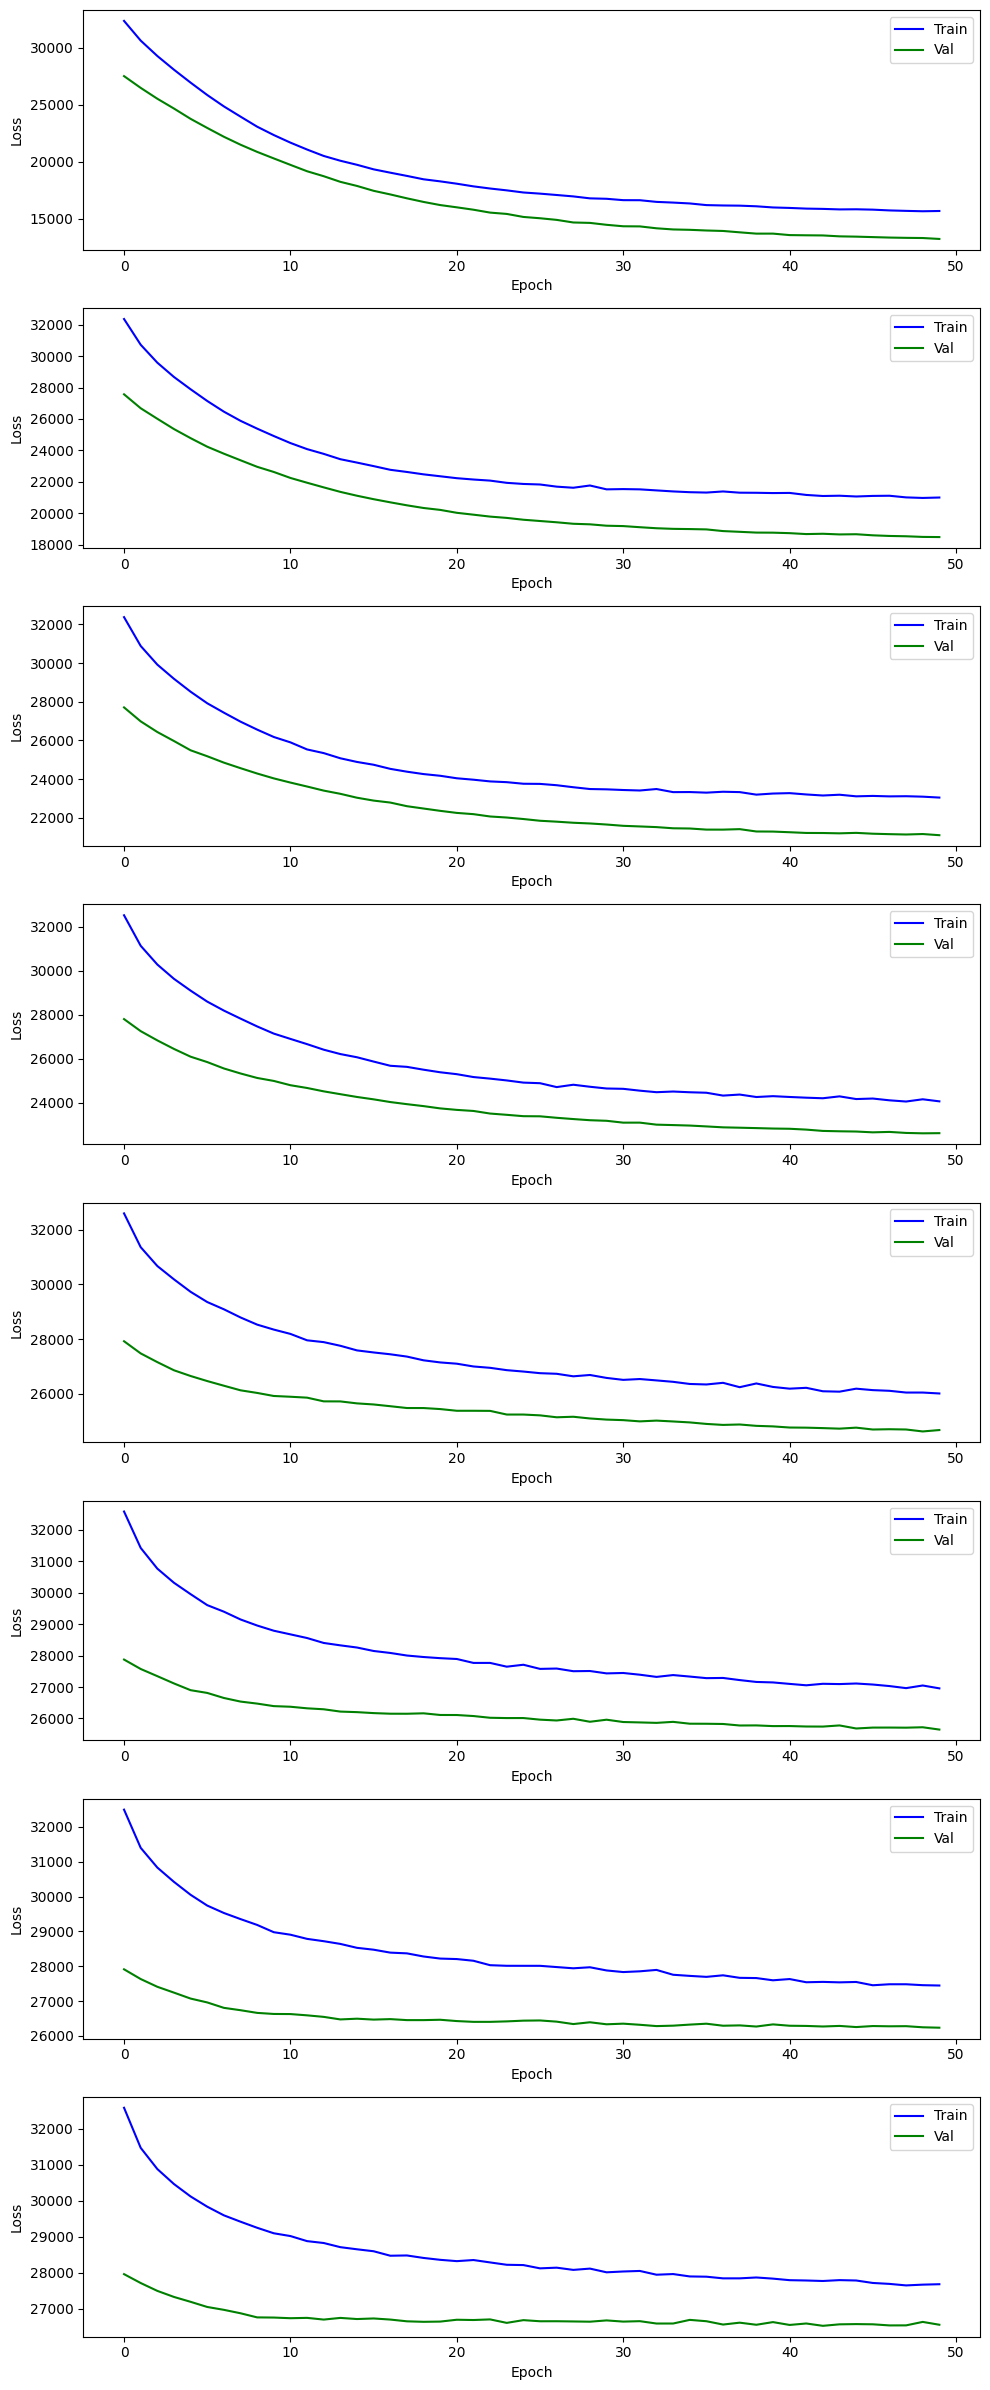

In [4]:
inference_helpers.arrange_figures_in_rows(n_rows=num_models, prefix="XYZ_exact")